# Libraries

In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
import string
import nltk
nltk.download('stopwords')
import shutil

import seaborn as sns
import matplotlib.pylab as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/clairephibbs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#os.chdir('C:\\Users\\halle.davis\\Downloads\\') ## Halle's work folder path
#os.chdir('/Users/halledavis/Downloads/') ## Halle's personal folder path
os.chdir('/users/clairephibbs/Desktop/Capstone') ## Claire's folder path
#os.chdir('') ## Summer's folder path

# Data Load

### Dataset Description
1. EVENT_NO (VARCHAR2): A preassigned number used to identify each inspection, investigation, audit, survey, etc.  Use event_no to join to the Inspections table which can be joined to the Mines table with mine_id.
2. INSPECTION_BEGIN_DT (DATE): Start date of the inspection (mm/dd/yyyy).
3. INSPECTION_END_DT (DATE): Inspection close out date (mm/dd/yyyy).
4. VIOLATION_NO (VARCHAR2): Citation/order number assigned to each citation written during an inspection.  This is a unique key to the file.
5. CONTROLLER_ID (VARCHAR2): Identification number assigned by MSHA Assessments for a Legal Entity acting as a controller of an operator at the time the violation was cited. May contain null values if this record pertains to a violation issued to a contractor.
6. CONTROLLER_NAME (VARCHAR2): Name of the controller active at the time the violation was cited.  May contain null values if this record pertains to a violation issued to a contractor.
7. VIOLATOR_ID (VARCHAR2): Identification number assigned by MSHA for a Legal Entity acting as an operator at a mine at the time the violation was cited. May contain null values if this record pertains to a violation issued to a contractor.
8. VIOLATOR_NAME (VARCHAR2): Name of the operator active at the time the violation was cited.  May contain null values if this record pertains to a violation issued to a contractor.
9. VIOLATOR_TYPE_CD (VARCHAR2): Each Violator record represents an entity (Operator, Contractor, Agent or Miner) that has one or more violations at a mine.
10. MINE_ID (VARCHAR2): Mine id of the mine where the violation was issued.  Can use the mine_id to join to the Mines table.  
11. MINE_NAME (VARCHAR2): Name of the mine where the violation was issued.
12. MINE_TYPE (VARCHAR2): Mine type of the mine where the violation has been issued:  Facility, Surface or Underground.
13. COAL_METAL_IND (VARCHAR2): Identifies if the record is for a Coal or Metal/Non-Metal mine.
14. CONTRACTOR_ID (VARCHAR2): Code identifying the contractor to whom the citation or order was issued.  May contain null values if the contractor was not cited.
15. VIOLATION_ISSUE_DT (DATE): Date the citation or order was issued by the MSHA inspector.
16. VIOLATION_OCCUR_DT (DATE): Actual date of occurrence of the violation.  
17. CAL_YR (NUMBER): Calendar year during which the citation/order was issued by the MSHA inspector.
18. CAL_QTR (NUMBER): Calendar Quarter of the date the citation or order was issued by the MSHA inspector.
19. FISCAL_YR (NUMBER): Fiscal Year of the date the citation or order was issued by the MSHA inspector.  MSHA's fiscal year begins October 1 and ends September 30.
20. FISCAL_QTR (NUMBER): Fiscal Quarter of the date the citation or order was issued by the MSHA inspector.
21. VIOLATION_ISSUE_TIME (VARCHAR2): Time (24 hour) the citation or order was issued by the MSHA inspector.
22. SIG_SUB (VARCHAR2): An indicator as to whether or not the gravity is determined by the inspector to be significant and substantial.  If this is 'Y', the inspector has indicated that based upon the particular facts surrounding the violation there exists a reasonable likelihood the hazard contributed to will result in an injury or illness of a reasonably serious nature.
23. SECTION_OF_ACT (VARCHAR2): Section of the Act under which the citation/order was issued.  May contain null values.
24. PART_SECTION (VARCHAR2): Code of Federal Regulations: Part/section of Title 30 CFR violated in format PPSSSSSXXXX where (P) Part, (S) Section and (X) Suffix.  Four-digit section numbers are expanded to five within one leading zero.  May contain null values.
25. SECTION_OF_ACT_1 (VARCHAR2): Primary Section of Act which gives the MSHA Inspector the authority to take the action specified by this Issuance.   More than one type of action may be cited.
26. SECTION_OF_ACT_2 (VARCHAR2): Secondary Section of Act which gives the MSHA Inspector the authority to take the action specified by this Issuance at Metal/Non-Metal mines only.  More than one type of action may be cited.
27. CIT_ORD_SAFE (VARCHAR2): Specifies the type of Citation: Citation, Order, Safeguard, Written Notice or Notice.
28. ORIG_TERM_DUE_DT (DATE): Original date by which the cited condition was to be abated.  Original time by which the cited condition was to be abated. 
29. ORIG_TERM_DUE_TIME (VARCHAR2): Original time by which the cited condition was to be abated.   
30. LATEST_TERM_DUE_DT (DATE): Date by which the conditions cited in the citation/order are to be abated.  For Metal mines, this can be the termination due date to which the citation/order is extended.  
31. LATEST_TERM_DUE_TIME (VARCHAR2): Time by which the conditions cited on the citation/order are to be abated.  
32. TERMINATION_DT (DATE): Date on which the citation/order was terminated.  May contain null values if citation has not yet been terminated.
33. TERMINATION_TIME (VARCHAR2): Time of day (24 hour) at which the citation/order was terminated.  May contain null values if citation has not yet been terminated.
34. TERMINATION_TYPE (VARCHAR2): Code identifying the type of termination:  Issued, ReplacedByOrder or Terminated.
35. VACATE_DT (DATE): Date on which the citation/order was vacated.  May contain null values if the violation was not vacated.
36. VACATE_TIME (VARCHAR2): Time of day (24 hour) at which the citation/order was vacated.  May contain null values if the violation was not vacated.
37. INITIAL_VIOL_NO (VARCHAR2): This is the preceding citation record when there is a need to relate a citation to a previous one. For example this would apply when an order follows a citation. This relationship is needed to calculate the good faith reduction penalty points.  May contain null values.
38. REPLACED_BY_ORDER_NO (VARCHAR2): Order number which replaced the original citation.  May contain null values if situation does not apply.
39. LIKELIHOOD (VARCHAR2): This is a measure of the seriousness of the violation being cited as measured by the likelihood of the occurrence of an accident:  Highly, NoLikelihood, Occurred, Reasonably or Unlikely. May contain null values if situation does not apply.
40. INJ_ILLNESS (VARCHAR2): Value assigned to a violation for gravity of injury.  Measure of seriousness of violation being cited as measured by severity of the injury or illness to persons if accident were to occur due to the conditions of the violation: Fatal, LostDays, NoLostDays or Permanent.
41. NO_AFFECTED (NUMBER): This is a measure of the number of persons affected or potentially affected by the conditions at the Mine due to the violation.  Can be zero.
42. NEGLIGENCE (VARCHAR2): Codes representing the degree of negligence that the Inspector assigned to the violator due to the violation:  HighNegligence, LowNegligence, ModNegligence, NoNegligence or Reckless. A high degree of negligence is assigned when the operator was in a position to be aware of the condition that contributed to a dangerous situation and there were no mitigating circumstances, or if there are unique aggravating circumstances associated with the violation, such as repeated past violations of the same standard at the mine.
43. WRITTEN_NOTICE (VARCHAR2): Indicates if this citation is a result of a Miner or Agent notice of complaint to MSHA (written notice 103(g)):  ('Y'  or 'N').  May contain null values.
44. ENFORCEMENT_AREA (VARCHAR2): Specifies the enforcement areas affected by the violating condition or practice constitute a health hazard, safety hazard, both or other type of hazard. May contain null values.
45. SPECIAL_ASSESS (VARCHAR2): Specifies whether this citation has been designated for Special Assessment based on Special Assessment Review (Y or N).
46. PRIMARY_OR_MILL (VARCHAR2): A code indicating if the Violation was observed in the Primary Mine location or in an associated Mill (Metal/Non-Metal only). May contain null values.
47. RIGHT_TO_CONF_DT (DATE): Date the operator was advised of his right to a conference (Metal/Non-Metal only).  May contain null values.
48. ASMT_GENERATED_IND (VARCHAR2): If the violator is an Operator or Contractor, the indicator is 'N'. If the violator is an Agent, the indicator is 'Y'. If the violator is a Miner, the indicator can be 'Y' or 'N'. If none of the above, the indicator is '?'.
49. FINAL_ORDER_ISSUE_DT (DATE): Date that this assessment becomes a Final Order.  This date is set when the Certified Return Receipt date (CRR) is set.  Note that this can be a projected future date that is set as soon as the CRR is entered.  
50. PROPOSED_PENALTY (NUMBER): The original dollar value of the proposed penalty prior to any modifications such as those possibly resulting from a decision on a contested case.
51. AMOUNT_DUE (NUMBER): The current dollar value of the proposed assessment, reflecting any modifications that have been made since it was originally assessed.
52. AMOUNT_PAID (NUMBER): The total dollar value of all payments applied to this proposed assessment to date.
53. BILL_PRINT_DT (DATE): Date the bill was printed.  This date always represents the first time the bill was printed.
54. LAST_ACTION_CD (VARCHAR2): Last action taken against this violation such as 1stDemandPrinted, BillingReady, ApprovedforTreasury and Proposed.  
55. LAST_ACTION_DT (DATE): Date the last action taken against this violation.
56. DOCKET_NO (VARCHAR2): The Docket Number assigned by the Court to this group of Assessments being contested.
57. DOCKET_STATUS_CD (VARCHAR2): Denotes the current status of this docket:  Approved (approved by the court) or Proposed (not yet been approved by the court).
58. CONTESTED_IND (VARCHAR2): Indicates if this violation has been assessed and is being contested (Y or N).
59. CONTESTED_DT (DATE): Date of the most recent docket status for this violation.
60. VIOLATOR_VIOLATION_CNT (NUMBER): Total number of assessed violations for this violator at this time during the violation history period. Used in penalty calculation.  Applies to an Operator or a Contractor.
61. VIOLATOR_INSPECTION_DAY_CNT (NUMBER): Total number of inspections for this Operator at a mine during the violation history period. Used in penalty calculation. Does not apply to Contractor.

In [ ]:
# violations = pd.read_csv('Violations.txt', sep= '|', encoding = 'latin-1')
inspections = pd.read_csv('Inspections.txt', sep= '|', encoding = 'latin-1')
mines = pd.read_csv('Mines.txt', sep= '|', encoding = 'latin-1')

# EDA (Exploratory Data Analysis)

## Violations Dataset

### Initial Peek at Data

In [4]:
violations.head() # head

,EVENT_NO,INSPECTION_BEGIN_DT,INSPECTION_END_DT,VIOLATION_NO,CONTROLLER_ID,CONTROLLER_NAME,VIOLATOR_ID,VIOLATOR_NAME,VIOLATOR_TYPE_CD,MINE_ID,...,AMOUNT_PAID,BILL_PRINT_DT,LAST_ACTION_CD,LAST_ACTION_DT,DOCKET_NO,DOCKET_STATUS_CD,CONTESTED_IND,CONTESTED_DT,VIOLATOR_VIOLATION_CNT,VIOLATOR_INSPECTION_DAY_CNT
0,711256,01/04/2000,01/07/2000,6089192,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,55.0,12/04/2000,Paid,01/08/2001,NaN,NaN,N,NaN,0.0,0.0
1,711256,01/04/2000,01/07/2000,6089193,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,55.0,12/04/2000,Paid,01/08/2001,NaN,NaN,N,NaN,0.0,0.0
2,711256,01/04/2000,01/07/2000,6089194,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,55.0,12/04/2000,Paid,01/08/2001,NaN,NaN,N,NaN,0.0,0.0
3,711256,01/04/2000,01/07/2000,6089195,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,196.0,12/04/2000,Paid,01/08/2001,NaN,NaN,N,NaN,0.0,0.0
4,711256,01/04/2000,01/07/2000,6089196,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,55.0,12/04/2000,Paid,01/08/2001,NaN,NaN,N,NaN,0.0,0.0


In [5]:
print(violations.shape) # shape

(2812757, 61)


INSIGHT: We have more than 2 million rows (almost 3 million) and 61 columns.

In [6]:
violations.describe() # description

,EVENT_NO,VIOLATION_NO,MINE_ID,CAL_YR,CAL_QTR,FISCAL_YR,FISCAL_QTR,VIOLATION_ISSUE_TIME,ORIG_TERM_DUE_TIME,LATEST_TERM_DUE_TIME,TERMINATION_TIME,VACATE_TIME,NO_AFFECTED,PROPOSED_PENALTY,AMOUNT_DUE,AMOUNT_PAID,VIOLATOR_VIOLATION_CNT,VIOLATOR_INSPECTION_DAY_CNT
count,2.812757e+06,2.812757e+06,2.812757e+06,2.812757e+06,2.812757e+06,2.812757e+06,2.812757e+06,2.812757e+06,2.134975e+06,2.718445e+06,2.794131e+06,70.000000,2.812757e+06,2.749690e+06,2.749690e+06,2.749690e+06,2.749690e+06,2.749690e+06
mean,4.463453e+06,7.854388e+06,2.698194e+06,2.010446e+03,2.441750e+00,2.010670e+03,2.546500e+00,1.123196e+03,1.217979e+03,1.200539e+03,1.152241e+03,22.157143,1.481975e+00,5.890649e+02,4.720882e+02,4.070087e+02,1.231055e+02,1.673952e+02
std,2.214542e+06,1.184529e+06,1.552248e+06,6.281720e+00,1.103279e+00,6.286221e+00,1.098501e+00,3.106758e+02,3.742648e+02,3.763959e+02,3.180579e+02,185.379957,6.266838e+00,3.111682e+03,2.254934e+03,1.887374e+03,2.281404e+02,3.010801e+02
min,3.206180e+05,7.299270e+05,1.000030e+05,1.994000e+03,1.000000e+00,1.994000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.041855e+06,7.044468e+06,1.509571e+06,2.006000e+03,1.000000e+00,2.006000e+03,2.000000e+00,9.300000e+02,9.000000e+02,9.000000e+02,9.350000e+02,0.000000,1.000000e+00,1.000000e+02,1.000000e+02,6.000000e+01,1.000000e+00,1.000000e+00
50%,4.413849e+06,8.042356e+06,2.602246e+06,2.010000e+03,2.000000e+00,2.010000e+03,3.000000e+00,1.100000e+03,1.200000e+03,1.200000e+03,1.125000e+03,0.000000,1.000000e+00,1.230000e+02,1.230000e+02,1.170000e+02,1.500000e+01,1.800000e+01
75%,6.542202e+06,8.817967e+06,4.405166e+06,2.015000e+03,3.000000e+00,2.015000e+03,4.000000e+00,1.302000e+03,1.500000e+03,1.500000e+03,1.335000e+03,0.000000,1.000000e+00,3.080000e+02,2.860000e+02,2.630000e+02,1.350000e+02,1.780000e+02
max,8.890948e+06,9.988780e+06,5.500013e+06,2.023000e+03,4.000000e+00,2.023000e+03,4.000000e+00,2.359000e+03,2.359000e+03,2.359000e+03,2.359000e+03,1551.000000,9.990000e+02,2.462000e+05,2.462000e+05,2.200000e+05,2.452000e+03,3.044000e+03


INSIGHT: There's a lot of garbage in here (ID's and dates) so we'll wait until numeric EDA to comment further.

In [7]:
violations.info() # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2812757 entries, 0 to 2812756
Data columns (total 61 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   EVENT_NO                     int64  
 1   INSPECTION_BEGIN_DT          object 
 2   INSPECTION_END_DT            object 
 3   VIOLATION_NO                 int64  
 4   CONTROLLER_ID                object 
 5   CONTROLLER_NAME              object 
 6   VIOLATOR_ID                  object 
 7   VIOLATOR_NAME                object 
 8   VIOLATOR_TYPE_CD             object 
 9   MINE_ID                      int64  
 10  MINE_NAME                    object 
 11  MINE_TYPE                    object 
 12  COAL_METAL_IND               object 
 13  CONTRACTOR_ID                object 
 14  VIOLATION_ISSUE_DT           object 
 15  VIOLATION_OCCUR_DT           object 
 16  CAL_YR                       int64  
 17  CAL_QTR                      int64  
 18  FISCAL_YR                    int64  
 19  

In [8]:
pd.set_option('display.max_rows', None)

missing_sum = violations.isna().sum()
print(missing_sum[missing_sum > 0]) # nulls

pd.reset_option('display.max_rows')

INSPECTION_END_DT                 7665
CONTROLLER_ID                   192131
CONTROLLER_NAME                 192131
VIOLATOR_ID                        120
VIOLATOR_NAME                      135
MINE_TYPE                           21
CONTRACTOR_ID                  2622477
SIG_SUB                          45093
SECTION_OF_ACT                 2796797
PART_SECTION                     30731
SECTION_OF_ACT_2               2811540
ORIG_TERM_DUE_DT                677782
ORIG_TERM_DUE_TIME              677782
LATEST_TERM_DUE_DT               94312
LATEST_TERM_DUE_TIME             94312
TERMINATION_DT                   18626
TERMINATION_TIME                 18626
VACATE_DT                      2812687
VACATE_TIME                    2812687
INITIAL_VIOL_NO                2737136
REPLACED_BY_ORDER_NO           2795513
LIKELIHOOD                       46331
INJ_ILLNESS                      46314
NEGLIGENCE                       46297
WRITTEN_NOTICE                 1440981
ENFORCEMENT_AREA         

INSIGHT: Some columns have nearly all nulls. Need to see if those nulls are true and the columns are relevant and create a plan to get rid of nulls (e.g. imputation).

### Numeric EDA

#### Overall Visualization

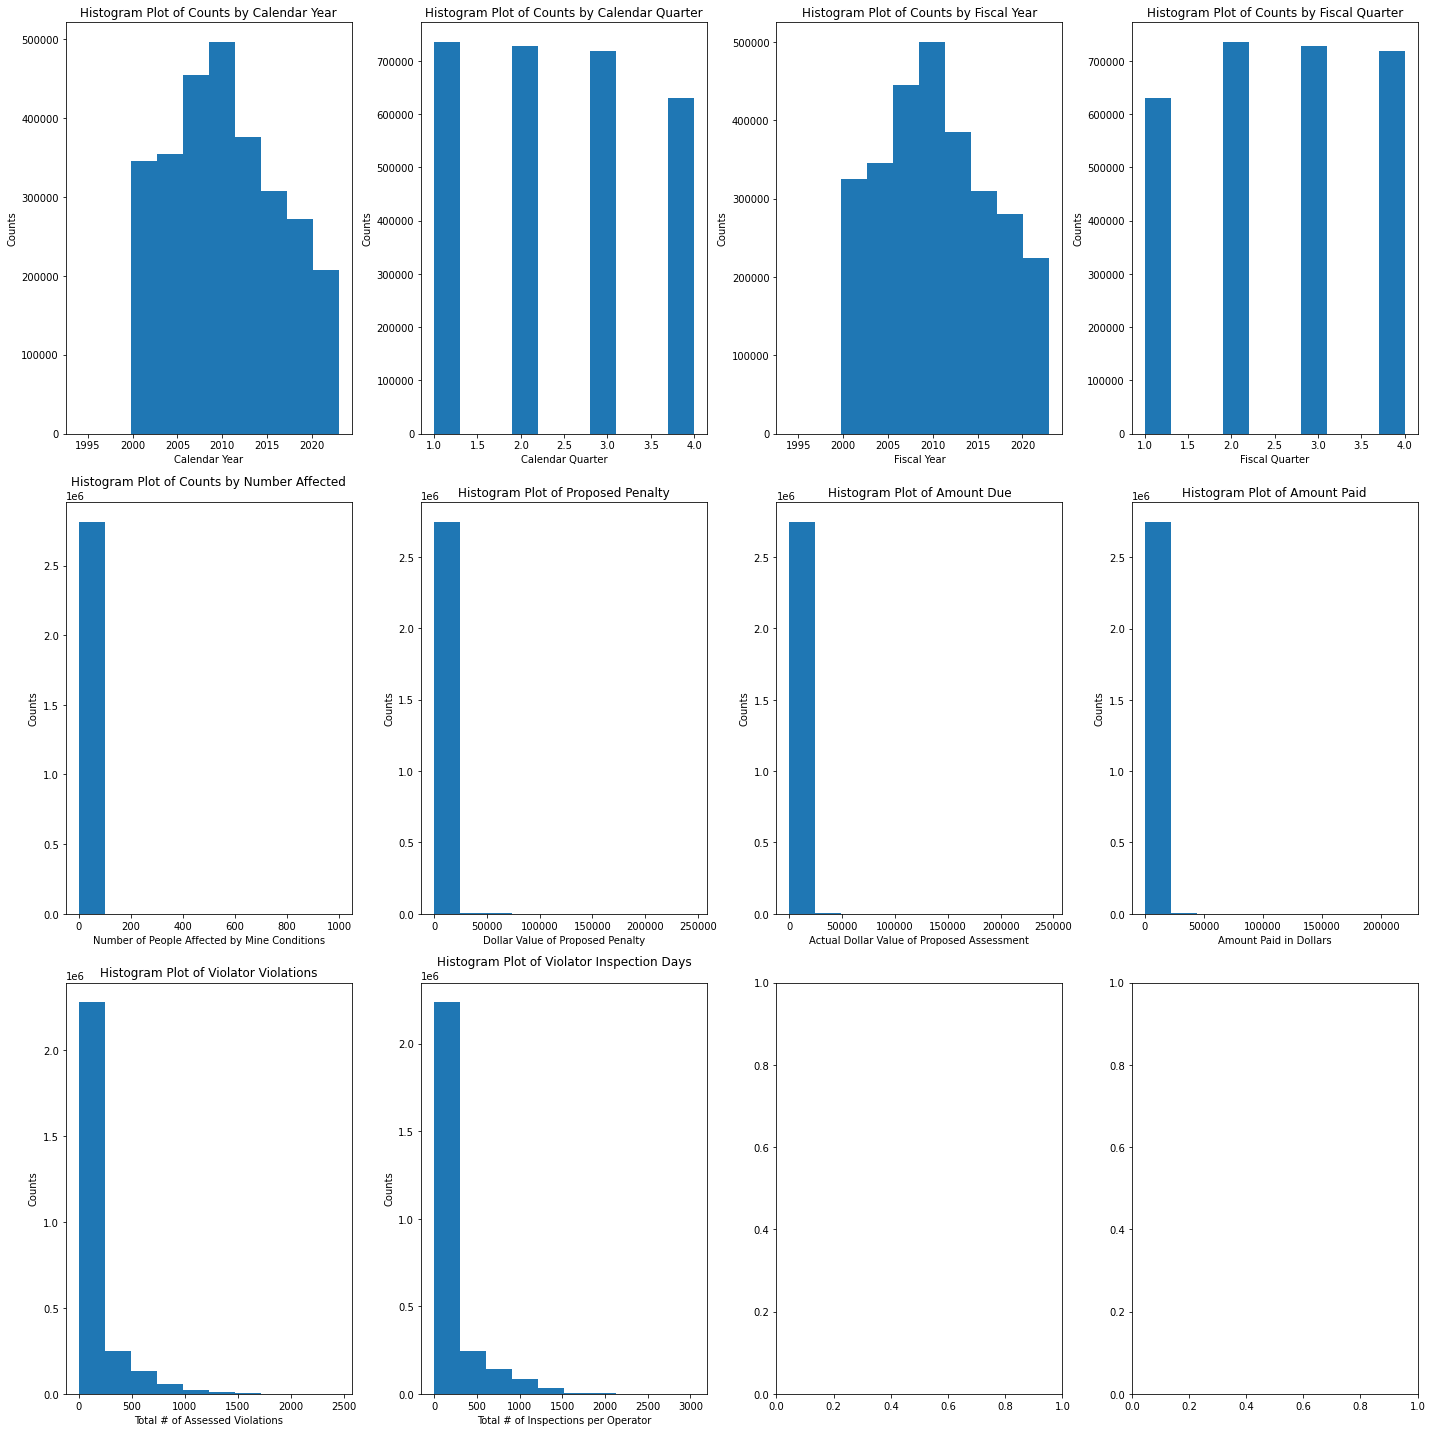

In [9]:
# scatter plots of numberical variables in violations df

fig, axs = plt.subplots(3, 4, figsize = (20, 20))

# cal_yr histogram
axs[0,0].hist(violations['CAL_YR'])
axs[0,0].set_xlabel('Calendar Year')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_title('Histogram Plot of Counts by Calendar Year')

# cal_qtr histogram
axs[0,1].hist(violations['CAL_QTR'])
axs[0,1].set_xlabel('Calendar Quarter')
axs[0,1].set_ylabel('Counts')
axs[0,1].set_title('Histogram Plot of Counts by Calendar Quarter')

# fiscal_yr histogram
axs[0,2].hist(violations['FISCAL_YR'])
axs[0,2].set_xlabel('Fiscal Year')
axs[0,2].set_ylabel('Counts')
axs[0,2].set_title('Histogram Plot of Counts by Fiscal Year')

# fiscal_qtr histogram
axs[0,3].hist(violations['FISCAL_QTR'])
axs[0,3].set_xlabel('Fiscal Quarter')
axs[0,3].set_ylabel('Counts')
axs[0,3].set_title('Histogram Plot of Counts by Fiscal Quarter')

# no_affected histogram
axs[1,0].hist(violations['NO_AFFECTED'])
axs[1,0].set_xlabel('Number of People Affected by Mine Conditions')
axs[1,0].set_ylabel('Counts')
axs[1,0].set_title('Histogram Plot of Counts by Number Affected')

# proposed_penalty histogram
axs[1,1].hist(violations['PROPOSED_PENALTY'])
axs[1,1].set_xlabel('Dollar Value of Proposed Penalty')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_title('Histogram Plot of Proposed Penalty')

# amount_due histogram
axs[1,2].hist(violations['AMOUNT_DUE'])
axs[1,2].set_xlabel('Actual Dollar Value of Proposed Assessment')
axs[1,2].set_ylabel('Counts')
axs[1,2].set_title('Histogram Plot of Amount Due')

# amount_paid histogram
axs[1,3].hist(violations['AMOUNT_PAID'])
axs[1,3].set_xlabel('Amount Paid in Dollars')
axs[1,3].set_ylabel('Counts')
axs[1,3].set_title('Histogram Plot of Amount Paid')

# violator_violation_cnt histogram
axs[2,0].hist(violations['VIOLATOR_VIOLATION_CNT'])
axs[2,0].set_xlabel('Total # of Assessed Violations')
axs[2,0].set_ylabel('Counts')
axs[2,0].set_title('Histogram Plot of Violator Violations')

# violator_inspection_day_cnt histogram
axs[2,1].hist(violations['VIOLATOR_INSPECTION_DAY_CNT'])
axs[2,1].set_xlabel('Total # of Inspections per Operator')
axs[2,1].set_ylabel('Counts')
axs[2,1].set_title('Histogram Plot of Violator Inspection Days')

plt.tight_layout()
plt.show()

INSIGHTS 

Violations are going down (since 2010 really).

There are less violations in Q4 (might need to remove 2023 to confirm that).

All other graphs are heavily right skewed. Need to dive in further to see if there are any outliers that need to be removed and what the real data picture is.

#### Number Affected

This is a measure of the number of persons affected or potentially affected by the conditions at the Mine due to the violation.  Can be zero.

In [10]:
violations.NO_AFFECTED.describe()

count    2.812757e+06
mean     1.481975e+00
std      6.266838e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.990000e+02
Name: NO_AFFECTED, dtype: float64

In [11]:
print(f"Skewness: {violations['NO_AFFECTED'].skew()}")
print(f"Kurtosis: {violations['NO_AFFECTED'].kurt()}")

Skewness: 123.18769580253895
Kurtosis: 18945.803369299865


INSIGHT: The average number affected is 1.5. The min is 0. The max is 999 - might want to look into that violation.

In [12]:
pd.set_option('display.max_rows', None)

print(violations[['NO_AFFECTED']].idxmax())
print(violations.iloc[2356982])

pd.reset_option('display.max_rows')

NO_AFFECTED    2355192
dtype: int64
EVENT_NO                                                   6567582
INSPECTION_BEGIN_DT                                     11/01/2011
INSPECTION_END_DT                                       11/02/2011
VIOLATION_NO                                               8648773
CONTROLLER_ID                                               M01111
CONTROLLER_NAME                William C Hunter; C Mike  Hunter Jr
VIOLATOR_ID                                                 L01265
VIOLATOR_NAME                            Pounding Mill Quarry Corp
VIOLATOR_TYPE_CD                                          Operator
MINE_ID                                                    4602793
MINE_NAME                                       Mercer Stone Plant
MINE_TYPE                                                  Surface
COAL_METAL_IND                                                   M
CONTRACTOR_ID                                                  NaN
VIOLATION_ISSUE_DT        

#### Proposed Penalty

The original dollar value of the proposed penalty prior to any modifications such as those possibly resulting from a decision on a contested case.

In [13]:
violations.PROPOSED_PENALTY.describe()

count    2.749690e+06
mean     5.890649e+02
std      3.111682e+03
min      1.000000e+00
25%      1.000000e+02
50%      1.230000e+02
75%      3.080000e+02
max      2.462000e+05
Name: PROPOSED_PENALTY, dtype: float64

In [14]:
print(f"Skewness: {violations['PROPOSED_PENALTY'].skew()}")
print(f"Kurtosis: {violations['PROPOSED_PENALTY'].kurt()}")

Skewness: 25.357471822941505
Kurtosis: 1038.3462147606333


INSIGHT: The average proposed penalty is 589.10 dollars. The min is 100 dollars and the max is 246,200 dollars - might want to look into that violation.

In [15]:
pd.set_option('display.max_rows', None)

print(violations[['PROPOSED_PENALTY']].idxmax())
print(violations.iloc[498123])

pd.reset_option('display.max_rows')

PROPOSED_PENALTY    497638
dtype: int64
EVENT_NO                                          6457591
INSPECTION_BEGIN_DT                            10/01/2018
INSPECTION_END_DT                              12/28/2018
VIOLATION_NO                                      9192409
CONTROLLER_ID                                     0129681
CONTROLLER_NAME                Foresight Energy Labor LLC
VIOLATOR_ID                                       0088324
VIOLATOR_NAME                          M-Class Mining LLC
VIOLATOR_TYPE_CD                                 Operator
MINE_ID                                           1103189
MINE_NAME                                       MC#1 Mine
MINE_TYPE                                     Underground
COAL_METAL_IND                                          C
CONTRACTOR_ID                                         NaN
VIOLATION_ISSUE_DT                             11/01/2018
VIOLATION_OCCUR_DT                             10/31/2018
CAL_YR                          

INSIGHT: The violation with the highest penalty is a highly likekly, fatal accident that waas characterized by reckless negligence.

#### Amount Due

The current dollar value of the proposed assessment, reflecting any modifications that have been made since it was originally assessed.

In [16]:
violations.AMOUNT_DUE.describe()

count    2.749690e+06
mean     4.720882e+02
std      2.254934e+03
min      0.000000e+00
25%      1.000000e+02
50%      1.230000e+02
75%      2.860000e+02
max      2.462000e+05
Name: AMOUNT_DUE, dtype: float64

In [17]:
print(f"Skewness: {violations['AMOUNT_DUE'].skew()}")
print(f"Kurtosis: {violations['AMOUNT_DUE'].kurt()}")

Skewness: 31.599053701732068
Kurtosis: 1819.0014472680868


In [18]:
print(violations[['AMOUNT_DUE']].idxmax())

AMOUNT_DUE    497638
dtype: int64


INSIGHT: The average amount due is 472.15 dollars. The min is 0 dollars and the max is 246,200 dollars.

#### Amount Paid

The total dollar value of all payments applied to this proposed assessment to date.

In [19]:
violations.AMOUNT_PAID.describe()

count    2.749690e+06
mean     4.070087e+02
std      1.887374e+03
min      0.000000e+00
25%      6.000000e+01
50%      1.170000e+02
75%      2.630000e+02
max      2.200000e+05
Name: AMOUNT_PAID, dtype: float64

In [20]:
print(f"Skewness: {violations['AMOUNT_PAID'].skew()}")
print(f"Kurtosis: {violations['AMOUNT_PAID'].kurt()}")

Skewness: 36.288776294181865
Kurtosis: 2640.550806662077


INSIGHT: The average amount paid is 406.92 dollars. The min is 0 dollars and the max is 220,000 dollars.

#### Violator Violations

Total number of assessed violations for this violator at this time during the violation history period. Used in penalty calculation.  Applies to an Operator or a Contractor.

In [21]:
violations.VIOLATOR_VIOLATION_CNT.describe()

count    2.749690e+06
mean     1.231055e+02
std      2.281404e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.500000e+01
75%      1.350000e+02
max      2.452000e+03
Name: VIOLATOR_VIOLATION_CNT, dtype: float64

In [22]:
print(f"Skewness: {violations['VIOLATOR_VIOLATION_CNT'].skew()}")
print(f"Kurtosis: {violations['VIOLATOR_VIOLATION_CNT'].kurt()}")

Skewness: 2.8629613360337864
Kurtosis: 10.353812836595168


INSIGHT: The average number of violations is 123. The min is 0 and the max is 2452. That's a lot of violations!

#### Violator Inspection Days

Total number of inspections for this Operator at a mine during the violation history period. Used in penalty calculation. Does not apply to Contractor.

In [23]:
violations.VIOLATOR_INSPECTION_DAY_CNT.describe()

count    2.749690e+06
mean     1.673952e+02
std      3.010801e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.800000e+01
75%      1.780000e+02
max      3.044000e+03
Name: VIOLATOR_INSPECTION_DAY_CNT, dtype: float64

In [24]:
print(f"Skewness: {violations['VIOLATOR_INSPECTION_DAY_CNT'].skew()}")
print(f"Kurtosis: {violations['VIOLATOR_INSPECTION_DAY_CNT'].kurt()}")

Skewness: 2.4310195679767457
Kurtosis: 6.338211719893775


INSIGHT: The average number of inspections is 167. The min is 0 and the max is 3044. That's a lot of inspections!

#### Pairwise Plots

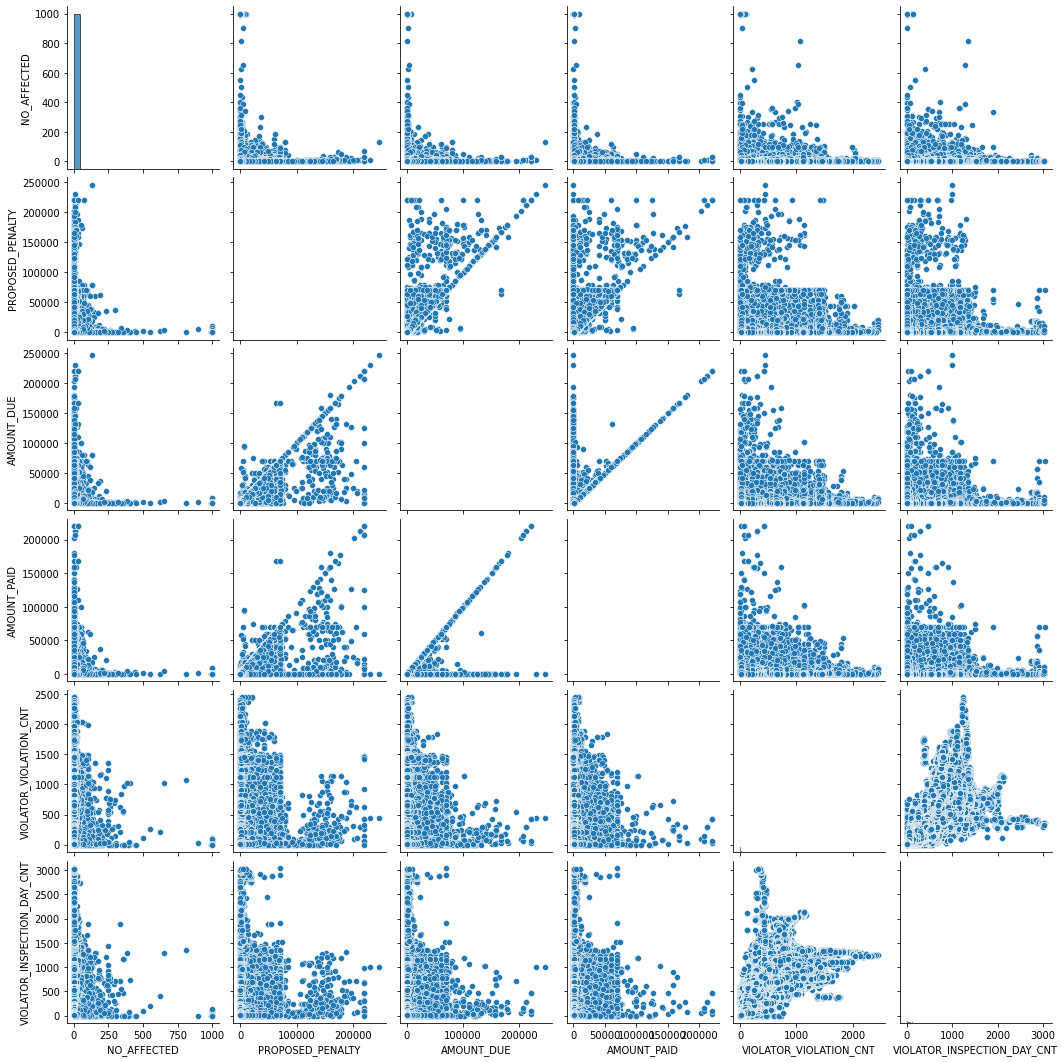

In [25]:
numeric_vars = violations[['NO_AFFECTED', 'PROPOSED_PENALTY', 'AMOUNT_DUE', 'AMOUNT_PAID', 'VIOLATOR_VIOLATION_CNT', 'VIOLATOR_INSPECTION_DAY_CNT']]
sns.pairplot(numeric_vars)
plt.show()

#### Correlation

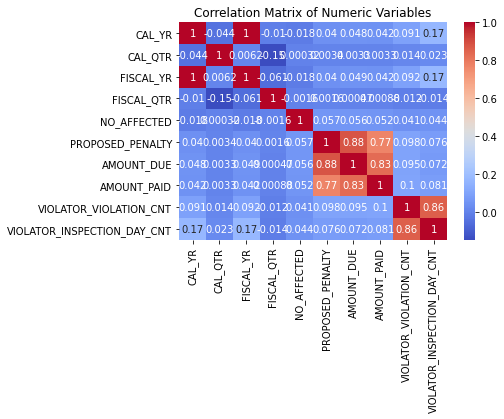

In [26]:
numeric_vars = violations[['CAL_YR', 'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 'NO_AFFECTED', 'PROPOSED_PENALTY', 'AMOUNT_DUE', 'AMOUNT_PAID', 'VIOLATOR_VIOLATION_CNT', 'VIOLATOR_INSPECTION_DAY_CNT']]
corr_matrix = numeric_vars.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

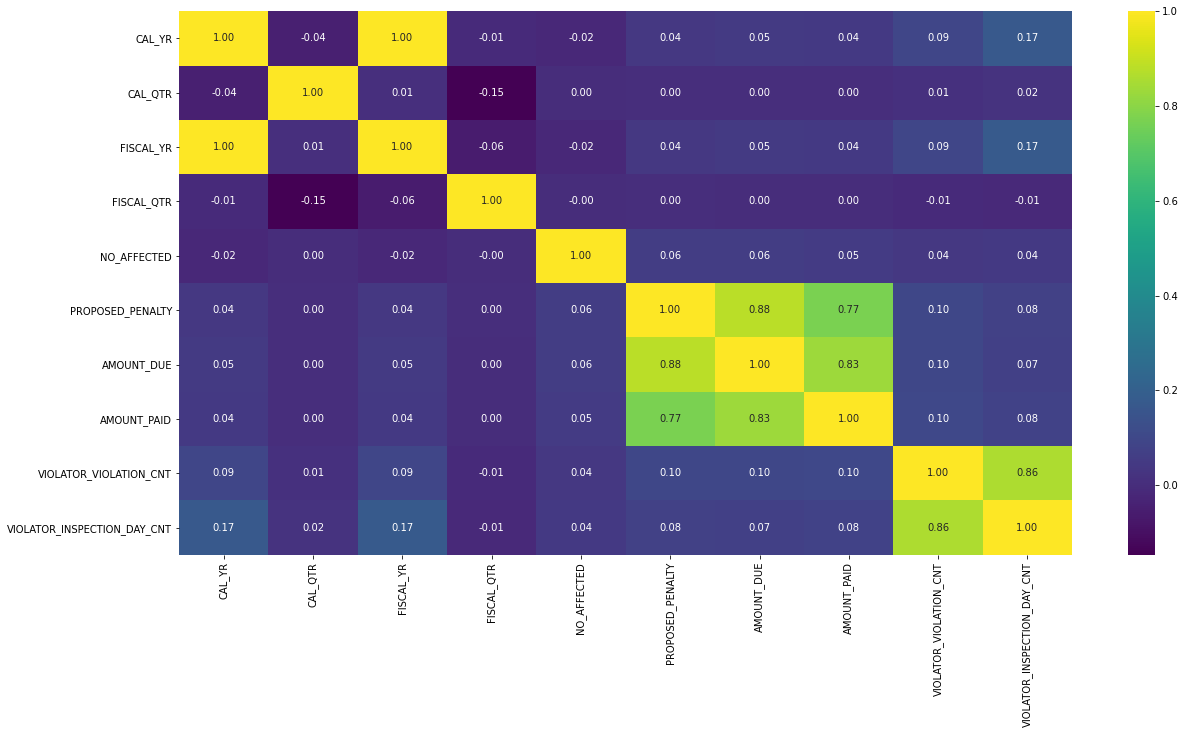

In [27]:
numeric_vars = violations[['CAL_YR', 'CAL_QTR', 'FISCAL_YR', 'FISCAL_QTR', 'NO_AFFECTED', 'PROPOSED_PENALTY', 'AMOUNT_DUE', 'AMOUNT_PAID', 'VIOLATOR_VIOLATION_CNT', 'VIOLATOR_INSPECTION_DAY_CNT']]
plt.subplots(figsize=(20,10))
sns.heatmap(numeric_vars.corr(), annot = True, fmt = ".2f", cmap = "viridis");

NOTE: PROPOSED_PENALTY and AMOUNT_DUE have a correleation coefficient of 0.88, indicating a high degree of correlation between the two variables. Proposed penalty is the original dollar amount of the proposed penalty prior to any modifications, while amount due is the current dollar value of the proposed assessment, reflecting any modeifications made since the original assessment. Given that the two are highly correlated, it seems that there is some type of relationship between perceived cause and actual cause of the accidents. 

INSIGHTS: 

Need to remove either FISCAL or CAL, not getting new info there.

I would argue number of affected is one of our key numeric variables and it doesnt seem at all correlated with any other numerical variable.

Amount paid, amount due, and proposed penalty are correlated, which makes sense.

Number of violations (VIOLATOR_VIOLATION_CNT) is supposed to inform penalties and their correlation is a mere 0.10. 

### Categorical EDA

#### Overall Visualizations

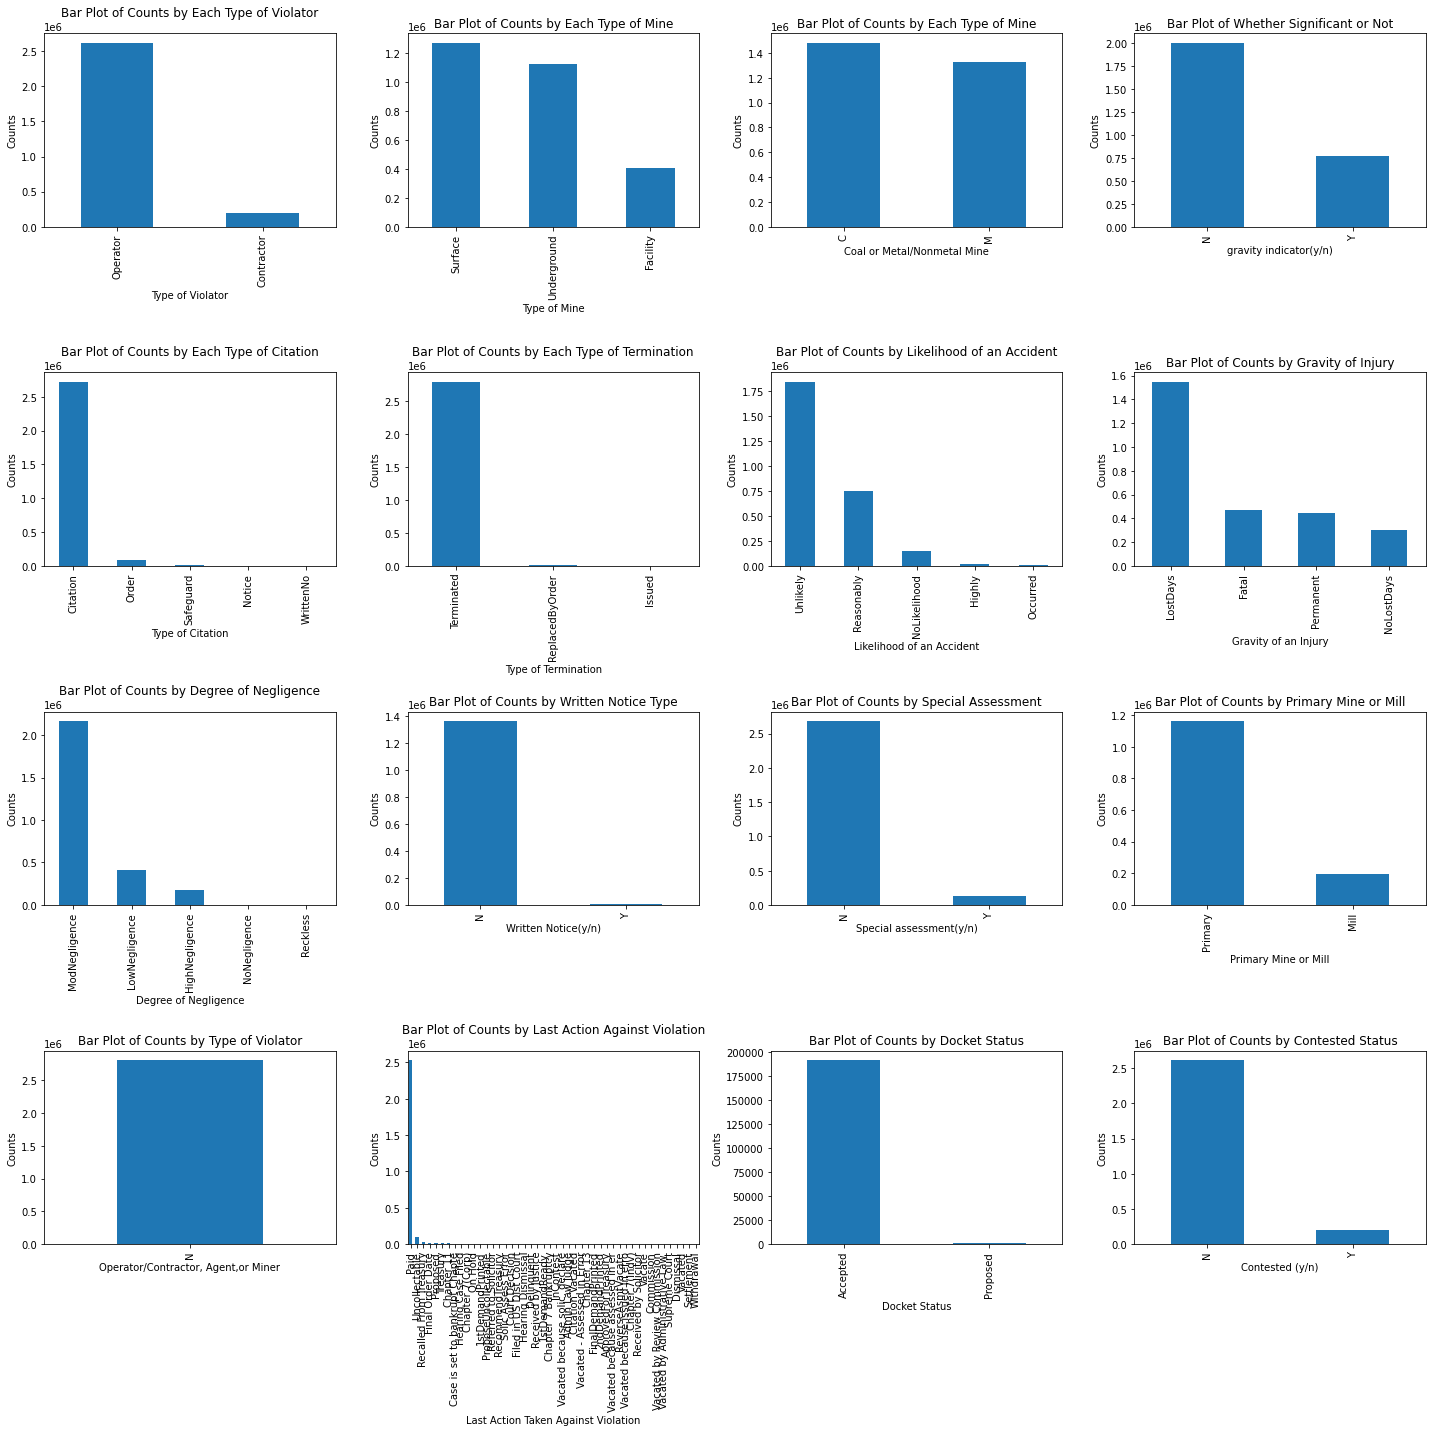

In [28]:
# bar plots of categorical and binary variables in violations df

fig, axs = plt.subplots(4, 4, figsize = (20, 20))

# violator_type_cd bar chart
violations['VIOLATOR_TYPE_CD'].value_counts().plot(kind = 'bar', ax = axs[0,0])
axs[0,0].set_xlabel('Type of Violator')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_title('Bar Plot of Counts by Each Type of Violator')

# mine_type bar chart
violations['MINE_TYPE'].value_counts().plot(kind = 'bar', ax = axs[0,1])
axs[0,1].set_xlabel('Type of Mine')
axs[0,1].set_ylabel('Counts')
axs[0,1].set_title('Bar Plot of Counts by Each Type of Mine')

# coal_metal_ind bar chart
violations['COAL_METAL_IND'].value_counts().plot(kind = 'bar', ax = axs[0,2])
axs[0,2].set_xlabel('Coal or Metal/Nonmetal Mine')
axs[0,2].set_ylabel('Counts')
axs[0,2].set_title('Bar Plot of Counts by Each Type of Mine')

# Sig_sub bar chart
violations['SIG_SUB'].value_counts().plot(kind = 'bar', ax = axs[0,3])
axs[0,3].set_xlabel('gravity indicator(y/n)')
axs[0,3].set_ylabel('Counts')
axs[0,3].set_title('Bar Plot of Whether Significant or Not')

# city_ord_safe bar chart
violations['CIT_ORD_SAFE'].value_counts().plot(kind = 'bar', ax = axs[1,0])
axs[1,0].set_xlabel('Type of Citation')
axs[1,0].set_ylabel('Counts')
axs[1,0].set_title('Bar Plot of Counts by Each Type of Citation')

# termination_type bar chart
violations['TERMINATION_TYPE'].value_counts().plot(kind = 'bar', ax = axs[1,1])
axs[1,1].set_xlabel('Type of Termination')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_title('Bar Plot of Counts by Each Type of Termination')

# likelihood bar chart
violations['LIKELIHOOD'].value_counts().plot(kind = 'bar', ax = axs[1,2])
axs[1,2].set_xlabel('Likelihood of an Accident')
axs[1,2].set_ylabel('Counts')
axs[1,2].set_title('Bar Plot of Counts by Likelihood of an Accident')

# inJ_illness bar chart
violations['INJ_ILLNESS'].value_counts().plot(kind = 'bar', ax = axs[1,3])
axs[1,3].set_xlabel('Gravity of an Injury')
axs[1,3].set_ylabel('Counts')
axs[1,3].set_title('Bar Plot of Counts by Gravity of Injury')

# negligence bar chart
violations['NEGLIGENCE'].value_counts().plot(kind = 'bar', ax = axs[2,0])
axs[2,0].set_xlabel('Degree of Negligence')
axs[2,0].set_ylabel('Counts')
axs[2,0].set_title('Bar Plot of Counts by Degree of Negligence')

# written_notice bar chart
violations['WRITTEN_NOTICE'].value_counts().plot(kind = 'bar', ax = axs[2,1])
axs[2,1].set_xlabel('Written Notice(y/n)')
axs[2,1].set_ylabel('Counts')
axs[2,1].set_title('Bar Plot of Counts by Written Notice Type')

# enforcement_area bar chart
violations['ENFORCEMENT_AREA'].value_counts().plot(kind = 'bar', ax = axs[2,2])
axs[2,2].set_xlabel('Enforcement Area Affected')
axs[2,2].set_ylabel('Counts')
axs[2,2].set_title('Bar Plot of Counts by Enforcement Area Affected')

# special_assess bar chart
violations['SPECIAL_ASSESS'].value_counts().plot(kind = 'bar', ax = axs[2,2])
axs[2,2].set_xlabel('Special assessment(y/n)')
axs[2,2].set_ylabel('Counts')
axs[2,2].set_title('Bar Plot of Counts by Special Assessment')

# primary_or_mill bar chart
violations['PRIMARY_OR_MILL'].value_counts().plot(kind = 'bar', ax = axs[2,3])
axs[2,3].set_xlabel('Primary Mine or Mill')
axs[2,3].set_ylabel('Counts')
axs[2,3].set_title('Bar Plot of Counts by Primary Mine or Mill')

# asmt_generated_ind bar chart
violations['ASMT_GENERATED_IND'].value_counts().plot(kind = 'bar', ax = axs[3,0])
axs[3,0].set_xlabel('Operator/Contractor, Agent,or Miner')
axs[3,0].set_ylabel('Counts')
axs[3,0].set_title('Bar Plot of Counts by Type of Violator')

# last_action_cd bar chart
violations['LAST_ACTION_CD'].value_counts().plot(kind = 'bar', ax = axs[3,1])
axs[3,1].set_xlabel('Last Action Taken Against Violation')
axs[3,1].set_ylabel('Counts')
axs[3,1].set_title('Bar Plot of Counts by Last Action Against Violation')

# docket_status_cd bar chart
violations['DOCKET_STATUS_CD'].value_counts().plot(kind = 'bar', ax = axs[3,2])
axs[3,2].set_xlabel('Docket Status')
axs[3,2].set_ylabel('Counts')
axs[3,2].set_title('Bar Plot of Counts by Docket Status')

# contested_ind bar chart
violations['CONTESTED_IND'].value_counts().plot(kind = 'bar', ax = axs[3,3])
axs[3,3].set_xlabel('Contested (y/n)')
axs[3,3].set_ylabel('Counts')
axs[3,3].set_title('Bar Plot of Counts by Contested Status')

plt.tight_layout()
plt.show()

INSIGHTS: 

By far, most violators are operators, not contractors. (Need to compare with inspections to see if this is due to differing volume of inspections).

Most mines are surface or underground, not facility.

Pretty even mix of coal and metal mines represented.

Apx. 1/3 of violations were likely to happen.

#### Violator Type

Each Violator record represents an entity (Operator, Contractor, Agent or Miner) that has one or more violations at a mine.

In [29]:
violations.VIOLATOR_TYPE_CD.value_counts(normalize = True)

VIOLATOR_TYPE_CD
Operator      0.932351
Contractor    0.067649
Name: proportion, dtype: float64

INSIGHT: 93% of violators are operators.

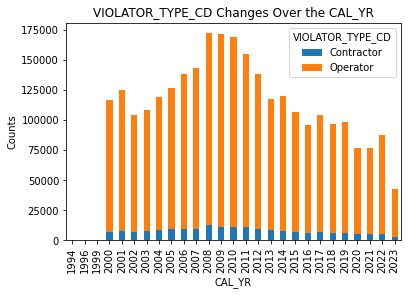

In [30]:
value_counts = violations.groupby('CAL_YR')['VIOLATOR_TYPE_CD'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('VIOLATOR_TYPE_CD Changes Over the CAL_YR')
plt.show()

#### Mine Type

Mine type of the mine where the violation has been issued:  Facility, Surface or Underground.

In [31]:
violations.MINE_TYPE.value_counts(normalize = True)

MINE_TYPE
Surface        0.453187
Underground    0.401084
Facility       0.145729
Name: proportion, dtype: float64

INSIGHT: 45% of violators are in surface mines, 40% are in underground, and only 14% in facility. Need to compare to mine types overall/inspection data.

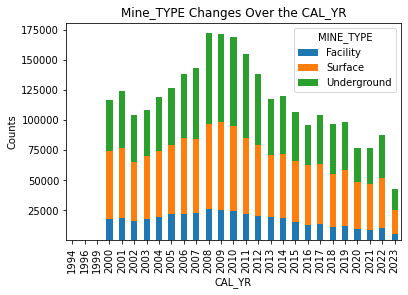

In [32]:
value_counts = violations.groupby('CAL_YR')['MINE_TYPE'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('Mine_TYPE Changes Over the CAL_YR')
plt.show()

#### Coal or Metal

Identifies if the record is for a Coal or Metal/Non-Metal mine.

In [33]:
violations.COAL_METAL_IND.value_counts(normalize = True)

COAL_METAL_IND
C    0.527112
M    0.472888
Name: proportion, dtype: float64

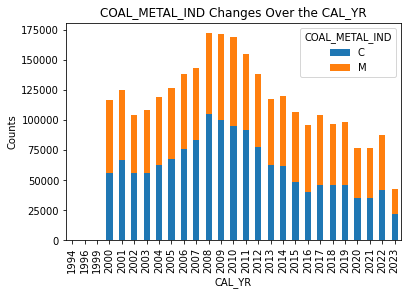

In [34]:
value_counts = violations.groupby('CAL_YR')['COAL_METAL_IND'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('COAL_METAL_IND Changes Over the CAL_YR')
plt.show()

#### Significant

An indicator as to whether or not the gravity is determined by the inspector to be significant and substantial.  If this is 'Y', the inspector has indicated that based upon the particular facts surrounding the violation there exists a reasonable likelihood the hazard contributed to will result in an injury or illness of a reasonably serious nature.

In [35]:
violations.SIG_SUB.value_counts(normalize = True)

SIG_SUB
N    0.72303
Y    0.27697
Name: proportion, dtype: float64

INSIGHT: 72% of violations are not "significant or substantial". 

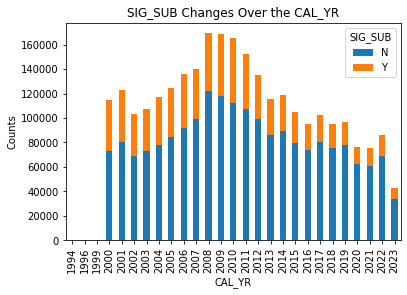

In [36]:
value_counts = violations.groupby('CAL_YR')['SIG_SUB'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('SIG_SUB Changes Over the CAL_YR')
plt.show()

#### City Ordinance

Specifies the type of Citation: Citation, Order, Safeguard, Written Notice or Notice.

In [37]:
violations.CIT_ORD_SAFE.value_counts(normalize = True)

CIT_ORD_SAFE
Citation     9.676662e-01
Order        2.958414e-02
Safeguard    2.746771e-03
Notice       2.133138e-06
WrittenNo    7.110461e-07
Name: proportion, dtype: float64

INSIGHT: 90% of violations are citations. Need to understand the heirarchy on these.

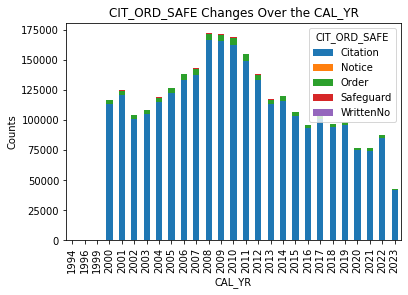

In [38]:
value_counts = violations.groupby('CAL_YR')['CIT_ORD_SAFE'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('CIT_ORD_SAFE Changes Over the CAL_YR')
plt.show()

#### Termination Type

Code identifying the type of termination:  Issued, ReplacedByOrder or Terminated.

In [39]:
violations.TERMINATION_TYPE.value_counts(normalize = True)

TERMINATION_TYPE
Terminated         0.993359
ReplacedByOrder    0.006149
Issued             0.000492
Name: proportion, dtype: float64

INSIGHT: 99% of violations are "Terminated" -- Not sure what it means that the citation was terminated. 

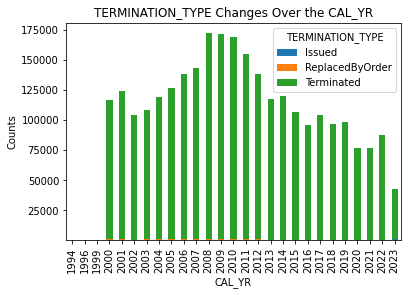

In [40]:
value_counts = violations.groupby('CAL_YR')['TERMINATION_TYPE'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('TERMINATION_TYPE Changes Over the CAL_YR')
plt.show()

#### Likelihood

This is a measure of the seriousness of the violation being cited as measured by the likelihood of the occurrence of an accident:  Highly, NoLikelihood, Occurred, Reasonably or Unlikely. May contain null values if situation does not apply.

In [41]:
violations.LIKELIHOOD.value_counts(normalize = True)

LIKELIHOOD
Unlikely        0.667532
Reasonably      0.272034
NoLikelihood    0.052712
Highly          0.005482
Occurred        0.002239
Name: proportion, dtype: float64

INSIGHT: Primarily unlikely, some reasonable, very few of everything else.

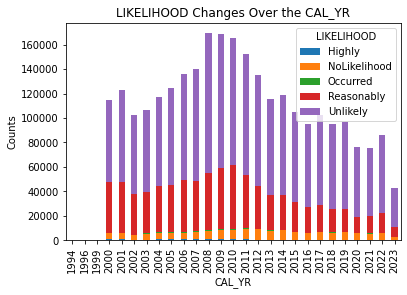

In [42]:
value_counts = violations.groupby('CAL_YR')['LIKELIHOOD'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('LIKELIHOOD Changes Over the CAL_YR')
plt.show()

INSIGHT: This actually does seem like not only are violations going down but so are reasonably likely violations.

#### Inj_Illness

Value assigned to a violation for gravity of injury.  Measure of seriousness of violation being cited as measured by severity of the injury or illness to persons if accident were to occur due to the conditions of the violation: Fatal, LostDays, NoLostDays or Permanent.

In [43]:
violations.INJ_ILLNESS.value_counts(normalize = True)

INJ_ILLNESS
LostDays      0.559726
Fatal         0.170811
Permanent     0.159858
NoLostDays    0.109605
Name: proportion, dtype: float64

INSIGHT: Primarily lostdays, even mix of everything else.

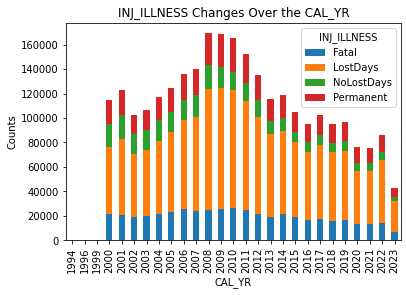

In [44]:
value_counts = violations.groupby('CAL_YR')['INJ_ILLNESS'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('INJ_ILLNESS Changes Over the CAL_YR')
plt.show()

#### Negligence

Codes representing the degree of negligence that the Inspector assigned to the violator due to the violation:  HighNegligence, LowNegligence, ModNegligence, NoNegligence or Reckless. A high degree of negligence is assigned when the operator was in a position to be aware of the condition that contributed to a dangerous situation and there were no mitigating circumstances, or if there are unique aggravating circumstances associated with the violation, such as repeated past violations of the same standard at the mine.

In [45]:
violations.NEGLIGENCE.value_counts(normalize = True)

NEGLIGENCE
ModNegligence     0.783884
LowNegligence     0.149816
HighNegligence    0.064228
NoNegligence      0.001350
Reckless          0.000722
Name: proportion, dtype: float64

INSIGHT: Primarily moderate negligence.

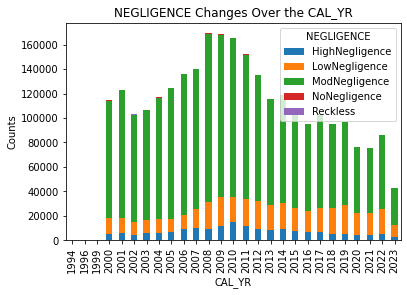

In [46]:
value_counts = violations.groupby('CAL_YR')['NEGLIGENCE'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('NEGLIGENCE Changes Over the CAL_YR')
plt.show()

#### Written Notice

Indicates if this citation is a result of a Miner or Agent notice of complaint to MSHA (written notice 103(g)):  ('Y'  or 'N').  May contain null values.

In [47]:
violations.WRITTEN_NOTICE.value_counts(normalize = True)

WRITTEN_NOTICE
N    0.996804
Y    0.003196
Name: proportion, dtype: float64

INSIGHT: Very few violations are the result of writer complaints -- meaning they are likely the result of random inspections?

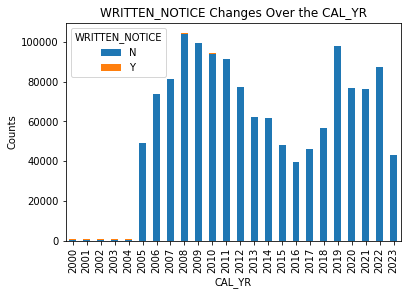

In [48]:
value_counts = violations.groupby('CAL_YR')['WRITTEN_NOTICE'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('WRITTEN_NOTICE Changes Over the CAL_YR')
plt.show()

INSIGHT: No "No"s until 2005 -- random inspections must have started then.

#### Special Assessment

Specifies whether this citation has been designated for Special Assessment based on Special Assessment Review (Y or N).

In [49]:
violations.SPECIAL_ASSESS.value_counts(normalize = True)

SPECIAL_ASSESS
N    0.95584
Y    0.04416
Name: proportion, dtype: float64

INSIGHT: Very few violations are designated for Special Assessment -- what is Special Assessment? Is it something about the investigation or the violation? Like follow up required? Or weird type of observation, need it assessed as to whether its a violation or not?

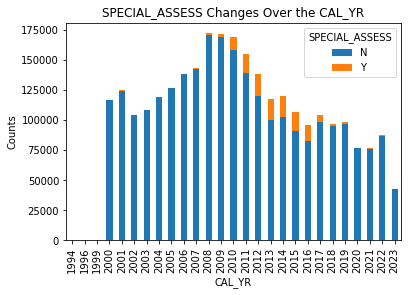

In [50]:
value_counts = violations.groupby('CAL_YR')['SPECIAL_ASSESS'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('SPECIAL_ASSESS Changes Over the CAL_YR')
plt.show()

INSIGHT: Special assessment only really occured during the Obama administration.

#### Primary or Mill

A code indicating if the Violation was observed in the Primary Mine location or in an associated Mill (Metal/Non-Metal only). May contain null values.

In [51]:
violations.PRIMARY_OR_MILL.value_counts(normalize = True)

PRIMARY_OR_MILL
Primary    0.857923
Mill       0.142077
Name: proportion, dtype: float64

INSIGHT: Most take place in the primary. Need more context here -- what's the difference between the two? What does this tell us? Why would there be nulls?

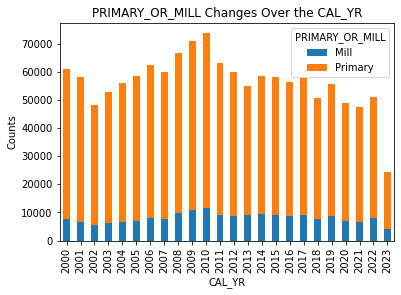

In [52]:
value_counts = violations.groupby('CAL_YR')['PRIMARY_OR_MILL'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('PRIMARY_OR_MILL Changes Over the CAL_YR')
plt.show()

#### Asmt Generated

If the violator is an Operator or Contractor, the indicator is 'N'. If the violator is an Agent, the indicator is 'Y'. If the violator is a Miner, the indicator can be 'Y' or 'N'. If none of the above, the indicator is '?'.

In [53]:
violations.ASMT_GENERATED_IND.value_counts(normalize = True)

ASMT_GENERATED_IND
N    1.0
Name: proportion, dtype: float64

INSIGHT: Everything is N? Probably best to drop this column, I think our dataset must be a filtered dataset.

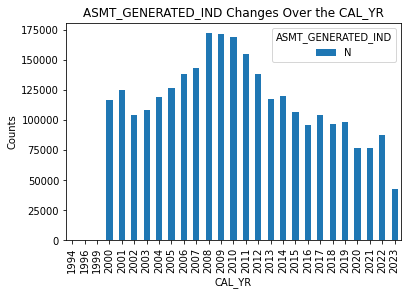

In [54]:
value_counts = violations.groupby('CAL_YR')['ASMT_GENERATED_IND'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('ASMT_GENERATED_IND Changes Over the CAL_YR')
plt.show()

#### Last Action

Last action taken against this violation such as 1stDemandPrinted, BillingReady, ApprovedforTreasury and Proposed.  

In [55]:
violations.LAST_ACTION_CD.value_counts(normalize = True)

LAST_ACTION_CD
Paid                              9.218988e-01
Uncollectable                     3.708472e-02
Recalled From Treasury            1.154099e-02
Final Order Date                  5.743220e-03
Proposed                          5.641026e-03
Treasury                          5.032591e-03
Chapter 11                        4.181218e-03
Case is set to bankrupt Chapte    2.491202e-03
Hearing Case Filed                2.024238e-03
Chapter 7(Corp)                   6.382568e-04
On Hold                           5.891601e-04
1stDemandPrinted                  5.495191e-04
ProposeUncollectable              4.778743e-04
Referred to Solicitor             4.425974e-04
RecommendTreasury                 2.702136e-04
Solic Assess Error                2.189348e-04
Court Decision                    1.760207e-04
Filed in US Dist Court            1.749296e-04
Hearing Dismissal                 1.676561e-04
Delinquent                        1.221962e-04
Received by Justice               1.091037e-0

INSIGHT: Most are paid. 

#### Docket Status

Denotes the current status of this docket:  Approved (approved by the court) or Proposed (not yet been approved by the court).

In [56]:
violations.DOCKET_STATUS_CD.value_counts(normalize = True)

DOCKET_STATUS_CD
Accepted    0.996387
Proposed    0.003613
Name: proportion, dtype: float64

INSIGHT: Basically everything is accepted.

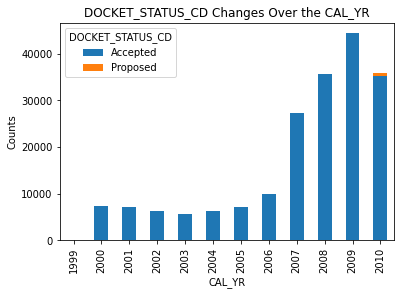

In [57]:
value_counts = violations.groupby('CAL_YR')['DOCKET_STATUS_CD'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('DOCKET_STATUS_CD Changes Over the CAL_YR')
plt.show()

INSIGHT: Makes sense that only the most recent data would still be in proposed status -- but no data 2011-2023?

#### Docket Status

Denotes the current status of this docket:  Approved (approved by the court) or Proposed (not yet been approved by the court).

In [58]:
violations.CONTESTED_IND.value_counts(normalize = True)

CONTESTED_IND
N    0.931413
Y    0.068587
Name: proportion, dtype: float64

INSIGHT: 93% not contested.

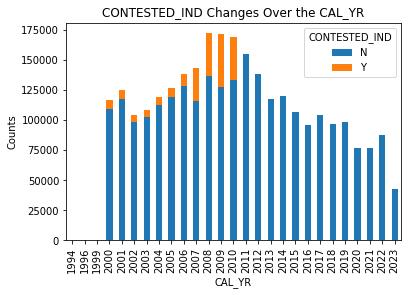

In [59]:
value_counts = violations.groupby('CAL_YR')['CONTESTED_IND'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('CONTESTED_IND Changes Over the CAL_YR')
plt.show()

INSIGHT: Weird that nothing has been contested since 2011? Have the rules changed for contesting?

#### Enforcement Area

Specifies the enforcement areas affected by the violating condition or practice constitute a health hazard, safety hazard, both or other type of hazard. May contain null values.

In [60]:
violations.ENFORCEMENT_AREA.value_counts(normalize = True)

ENFORCEMENT_AREA
Safety             0.952724
Health             0.030129
Other              0.012258
HealthAndSafety    0.004888
Name: proportion, dtype: float64

INSIGHT: 95% are safety violations.

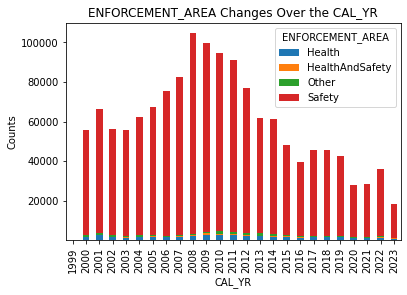

In [61]:
value_counts = violations.groupby('CAL_YR')['ENFORCEMENT_AREA'].value_counts().unstack()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('ENFORCEMENT_AREA Changes Over the CAL_YR')
plt.show()

#### Controller

Name of the controller active at the time the violation was cited.  May contain null values if this record pertains to a violation issued to a contractor.

In [62]:
controller_valuecounts = violations['CONTROLLER_NAME'].value_counts()
controller_valuecounts_filtered = controller_valuecounts[controller_valuecounts >= 1000]
controller_valuecounts_filtered

CONTROLLER_NAME
CONSOL Energy Inc                  85575
Massey Energy Company              79622
Alpha Natural Resources, Inc.      66628
Alliance Resource Partners LP      62528
Robert E  Murray                   60291
                                   ...  
Wilma  Wagner                       1017
Estate of Henry T. Southway Jr.     1015
David  Stevenson                    1015
James P  Jurgensen                  1005
Fred Weber, Inc.                    1001
Name: count, Length: 300, dtype: int64

#### Section of Act

Section of the Act under which the citation/order was issued.  May contain null values.

In [63]:
violations.SECTION_OF_ACT.value_counts(normalize = True)

SECTION_OF_ACT
316(b)              0.347556
103(h)              0.103634
103(k)              0.088409
316(b)(2)(A)        0.073058
103(d)              0.071241
109(a)              0.054637
107(a)              0.051190
109(d)              0.044549
316(b)(2)(F)(ii)    0.037030
103(a)              0.028885
104(b)              0.025815
104(g)(1)           0.013095
104(a)              0.011967
110(j)              0.008835
316(b)(2)           0.007393
103(j)              0.007018
115(a)              0.004323
104(d)(1)           0.004135
104(d)(2)           0.003697
314(b)              0.002694
316(b)(2)(C)        0.001817
203(a)              0.001692
103(f)              0.001504
109(c)              0.000877
103(a)(h)           0.000501
115(b)              0.000501
101(a)(7)           0.000439
115(e)              0.000439
105(c)              0.000439
115(a)(3)           0.000439
115(a)(2)           0.000376
317(c)              0.000376
108(a)(1)(b)        0.000188
115(a)(4)           0.000188

INSIGHT: 33% of violations are under section 316(b) - Should check out that section.

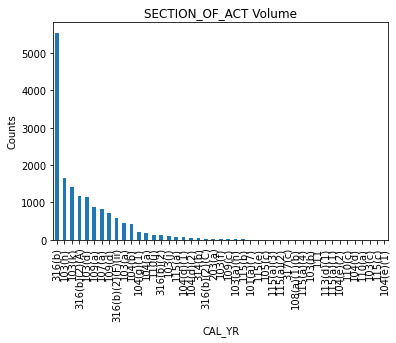

In [64]:
value_counts = violations['SECTION_OF_ACT'].value_counts()
value_counts.plot(kind='bar', stacked=True)
plt.xlabel('CAL_YR')
plt.ylabel('Counts')
plt.title('SECTION_OF_ACT Volume')
plt.show()

#### Part Section

Code of Federal Regulations: Part/section of Title 30 CFR violated in format PPSSSSSXXXX where (P) Part, (S) Section and (X) Suffix.  Four-digit section numbers are expanded to five within one leading zero.  May contain null values.

In [65]:
violations['PART_SECTION'].value_counts()

PART_SECTION
75.400             137985
56.14107(a)        110926
56.14100(b)         64202
56.12004            62017
75.370(a)(1)        61266
                    ...  
57.16017                1
57.4660(c)              1
56.19109                1
57.5001(a/5)(a)         1
56.4001                 1
Name: count, Length: 5829, dtype: int64

#### Section of Act 1

Primary Section of Act which gives the MSHA Inspector the authority to take the action specified by this Issuance.   More than one type of action may be cited.

In [66]:
violations['SECTION_OF_ACT_1'].value_counts()

SECTION_OF_ACT_1
104(a)       2712915
104(g)(1)      23643
104(d)(1)      19159
104(b)         17660
103(k)         12915
104(d)(2)       9297
107(a)          8739
314(b)          7724
104(e)(2)        402
103(j)           254
104(e)(1)         48
104(c)             1
Name: count, dtype: int64

#### Section of Act 2

Secondary Section of Act which gives the MSHA Inspector the authority to take the action specified by this Issuance at Metal/Non-Metal mines only.  More than one type of action may be cited.

In [67]:
violations['SECTION_OF_ACT_2'].value_counts()

SECTION_OF_ACT_2
104(a)       1198
104(d)(1)      10
104(d)(2)       4
104(g)(1)       3
107(a)          2
Name: count, dtype: int64

#### Initial Viol No.

This is the preceding citation record when there is a need to relate a citation to a previous one. For example this would apply when an order follows a citation. This relationship is needed to calculate the good faith reduction penalty points.  May contain null values.

In [68]:
violations['INITIAL_VIOL_NO'].value_counts()

INITIAL_VIOL_NO
7126240.0    489
4182117.0    447
7096093      430
3111571.0    402
7126983.0    275
            ... 
9131397        1
9131398        1
9134296        1
9134297        1
8733426        1
Name: count, Length: 30113, dtype: int64

#### Replaced by Order No.

Order number which replaced the original citation.  May contain null values if situation does not apply.

In [69]:
violations['REPLACED_BY_ORDER_NO'].value_counts()

REPLACED_BY_ORDER_NO
8569821.0    2
8569825.0    2
8569824.0    2
8569823.0    2
8569822.0    2
            ..
6650590.0    1
6650600.0    1
8223480.0    1
8223481.0    1
7797678.0    1
Name: count, Length: 17237, dtype: int64

### Bivariate EDA

#### Violator Type: Number Affected

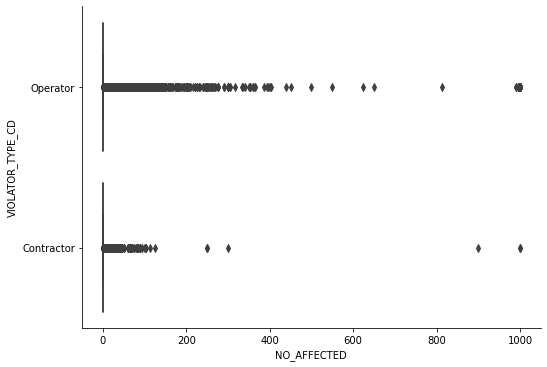

In [70]:
sns.catplot(x="NO_AFFECTED", y="VIOLATOR_TYPE_CD", data=violations, kind="box", aspect=1.5)
plt.show()

In [71]:
violations.groupby('VIOLATOR_TYPE_CD').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED               
                         min      mean  max
VIOLATOR_TYPE_CD                           
Contractor                 0  1.126203  999
Operator                   0  1.507789  999

INSIGHT: On average operator has more number affected, but unclear at this point if statistically significant difference (especially considering operator has way more violations).

#### Violator Type: Proposed Penalty

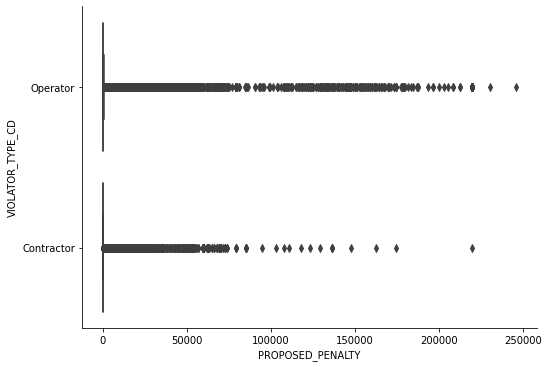

In [72]:
sns.catplot(x="PROPOSED_PENALTY", y="VIOLATOR_TYPE_CD", data=violations, kind="box", aspect=1.5)
plt.show()

In [73]:
violations.groupby('VIOLATOR_TYPE_CD').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                      
                              min        mean       max
VIOLATOR_TYPE_CD                                       
Contractor                   55.0  463.414133  220000.0
Operator                      1.0  598.159052  246200.0

INSIGHT: On average operator has a higher proposed penalty, but unclear at this point if statistically significant difference (especially considering operator has way more violations).

#### Coal Metal: Number Affected

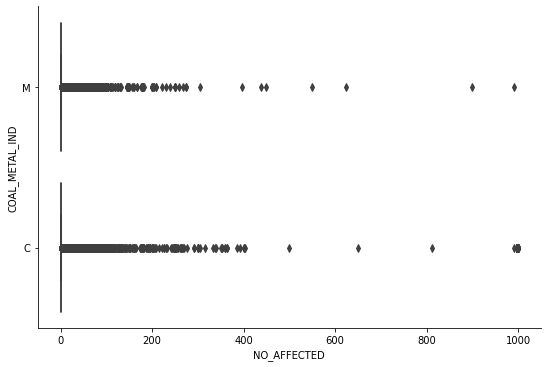

In [74]:
sns.catplot(x="NO_AFFECTED", y="COAL_METAL_IND", data=violations, kind="box", aspect=1.5)
plt.show()

In [75]:
violations.groupby('COAL_METAL_IND').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED               
                       min      mean  max
COAL_METAL_IND                           
C                        0  1.880991  999
M                        0  1.037205  991

INSIGHT: On average, coal has more affected. Seems big enough to be significant but have to see.

#### Coal Metal: Proposed Penalty

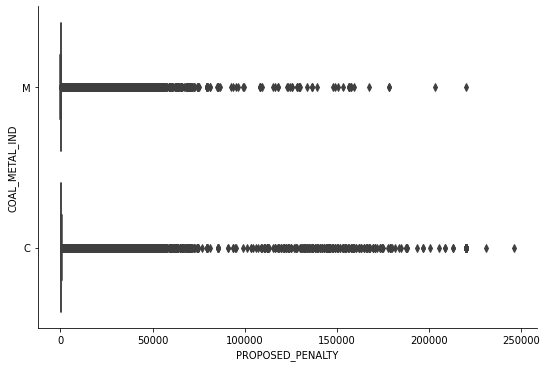

In [76]:
sns.catplot(x="PROPOSED_PENALTY", y="COAL_METAL_IND", data=violations, kind="box", aspect=1.5)
plt.show()

In [77]:
violations.groupby('COAL_METAL_IND').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                      
                            min        mean       max
COAL_METAL_IND                                       
C                          50.0  735.276449  246200.0
M                           1.0  427.264260  220000.0

INSIGHT: On average, coal has a way higher proposed penalty.

#### Sig Sub: Number Affected

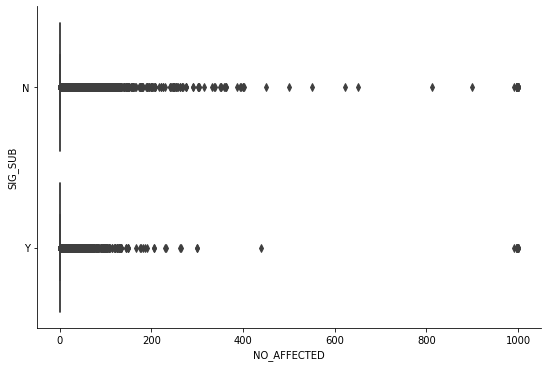

In [78]:
sns.catplot(x="NO_AFFECTED", y="SIG_SUB", data=violations, kind="box", aspect=1.5)
plt.show()

In [79]:
violations.groupby('SIG_SUB').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED               
                min      mean  max
SIG_SUB                           
N                 0  1.474118  999
Y                 0  1.589535  999

INSIGHT: Definitely expected to see a bigger difference here!

#### Sig Sub: Proposed Penalty

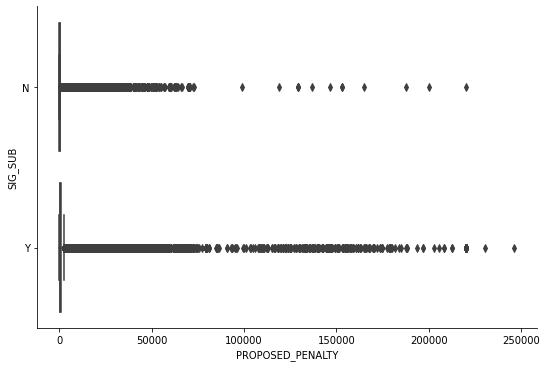

In [80]:
sns.catplot(x="PROPOSED_PENALTY", y="SIG_SUB", data=violations, kind="box", aspect=1.5)
plt.show()

In [81]:
violations.groupby('SIG_SUB').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                       
                     min         mean       max
SIG_SUB                                        
N                   50.0   250.786067  220000.0
Y                    1.0  1472.845271  246200.0

INSIGHT: Now here is a big difference!

#### Section of Act: Number Affected

In [82]:
violations.groupby('SECTION_OF_ACT').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED                
                         min       mean  max
SECTION_OF_ACT                              
101(a)(7)                  0   2.714286   10
103(a)                     0   2.264642  118
103(a)(h)                  0   0.125000    1
103(b)                     0   0.000000    0
103(c)                     1   1.000000    1
103(d)                     0   0.194371    2
103(f)                     0   7.333333  160
103(h)                     0   0.154776    7
103(j)                     0   0.687500   25
103(k)                     0   0.184266   24
104(a)                     0   1.554974   70
104(b)                     0   3.189320  998
104(d)                     1   1.000000    1
104(d)(1)                  0   2.393939   10
104(d)(2)                  0   1.915254   15
104(e)(1)                  0   0.000000    0
104(e)(2)                  1   2.500000    4
104(g)(1)                  0   2.425837   32
105(c)                     0   0.571429    1
107(a)                     0   0.062424    7
108(a)(1)(b)               1   1.000000    1
109(a)                     0   3.402523  393
109(c)                     0   0.214286    1
109(d)                     0   0.488045  101
110(a)                     2   2.000000    2
110(c)                     3   3.000000    3
110(j)                     0   4.425532  132
111                       56  58.500000   61
113(d)(1)                  1   1.000000    1
115(a)                     0   2.000000    6
115(a)(1)                  2   2.000000    2
115(a)(2)                  1   1.500000    3
115(a)(3)                  1   3.285714    7
115(a)(4)                  0   0.666667    1
115(b)                     0   3.375000   13
115(c)                     0   0.000000    0
115(e)                     0   3.571429   10
203(a)                     0  15.703704  180
314(b)                     0   2.418605   14
316(b)                     0   5.955111  110
316(b)(2)                  0   3.313559   36
316(b)(2)(A)               0   4.596055  183
316(b)(2)(C)               0   4.241379   17
316(b)(2)(F)(ii)           0   4.910321   40
317(c)                     1   2.666667   11

#### Section of Act: Proposed Penalty

In [83]:
violations.groupby('SECTION_OF_ACT').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                         
                              min           mean       max
SECTION_OF_ACT                                            
101(a)(7)                   100.0     117.714286     224.0
103(a)                       55.0    1664.790055  220000.0
103(a)(h)                    55.0    1682.800000    8000.0
103(b)                       55.0      85.000000     100.0
103(c)                       55.0      55.000000      55.0
103(d)                       55.0      65.987421     760.0
103(f)                       55.0     838.045455    5000.0
103(h)                       55.0      77.394622    2000.0
103(j)                       55.0     409.714286   10000.0
103(k)                       55.0    1804.173913   14700.0
104(a)                       55.0     366.651934   25000.0
104(b)                       55.0    1335.601449   52000.0
104(d)                     3500.0    3500.000000    3500.0
104(d)(1)                   112.0    5545.272727   70800.0
104(d)(2)                    55.0    5011.172414   35500.0
104(e)(1)                   129.0     129.000000     129.0
104(e)(2)                   154.0     264.000000     374.0
104(g)(1)                    55.0     693.931034   15700.0
105(c)                      116.0     470.400000    1264.0
107(a)                       55.0    2527.942857   25000.0
108(a)(1)(b)                 55.0      71.666667     100.0
109(a)                       55.0     100.408879     687.0
109(c)                       60.0      99.642857     121.0
109(d)                       55.0      70.882521    1247.0
110(a)                   138500.0  138500.000000  138500.0
110(c)                      116.0     116.000000     116.0
110(j)                      100.0     231.061224    1052.0
111                         100.0     125.000000     150.0
113(d)(1)                   116.0     144.500000     173.0
115(a)                       55.0     109.088235    1815.0
115(a)(1)                    79.0     175.000000     271.0
115(a)(2)                    55.0     413.333333    1000.0
115(a)(3)                   122.0     430.857143    1186.0
115(a)(4)                    55.0    1790.666667    5000.0
115(b)                       55.0      98.375000     135.0
115(c)                       55.0      55.000000      55.0
115(e)                       55.0     117.142857     293.0
203(a)                       55.0     381.740741    6996.0
314(b)                      121.0     745.657895    6725.0
316(b)                       60.0    1240.995615   72620.0
316(b)(2)                    60.0     719.855856    4353.0
316(b)(2)(A)                100.0    1825.764757  230600.0
316(b)(2)(C)                100.0     965.689655    6624.0
316(b)(2)(F)(ii)            100.0    1027.766839   56900.0
317(c)                      104.0    1052.000000    2000.0

#### Likelihood: Number Affected

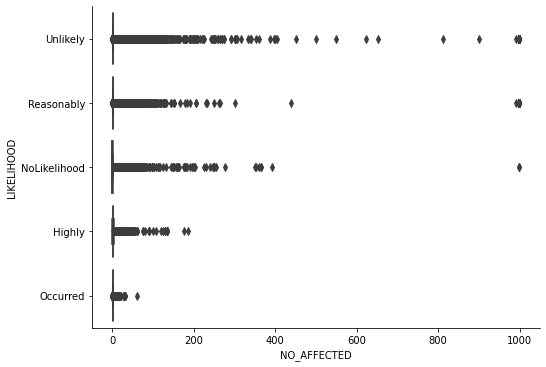

In [84]:
sns.catplot(x="NO_AFFECTED", y="LIKELIHOOD", data=violations, kind="box", aspect=1.5)
plt.show()

In [85]:
violations.groupby('LIKELIHOOD').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED               
                     min      mean  max
LIKELIHOOD                             
Highly                 0  2.487306  186
NoLikelihood           0  0.669542  998
Occurred               0  1.343720   60
Reasonably             0  1.579924  999
Unlikely               0  1.535572  999

INSIGHT: High likely things impact more people on average.

#### Likelihood: Proposed Penalty

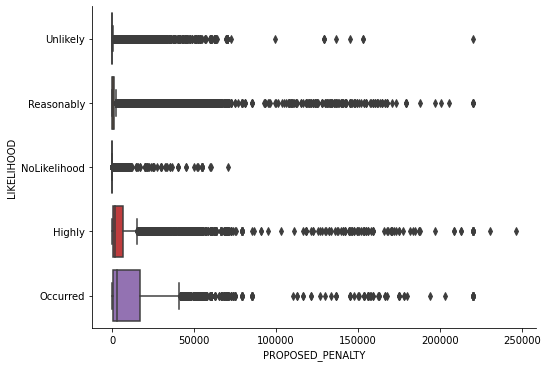

In [86]:
sns.catplot(x="PROPOSED_PENALTY", y="LIKELIHOOD", data=violations, kind="box", aspect=1.5)
plt.show()

In [87]:
violations.groupby('LIKELIHOOD').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                        
                          min          mean       max
LIKELIHOOD                                           
Highly                   55.0   8615.221286  246200.0
NoLikelihood             55.0    153.165868   70800.0
Occurred                 55.0  15427.745790  220000.0
Reasonably               50.0   1217.201960  220000.0
Unlikely                 50.0    253.964209  220000.0

#### Injury Illness: Number Affected

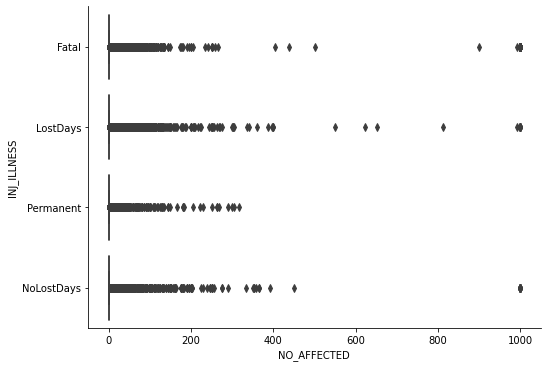

In [88]:
sns.catplot(x="NO_AFFECTED", y="INJ_ILLNESS", data=violations, kind="box", aspect=1.5)
plt.show()

In [89]:
violations.groupby('INJ_ILLNESS').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED               
                    min      mean  max
INJ_ILLNESS                           
Fatal                 0  1.609549  999
LostDays              0  1.565061  999
NoLostDays            0  1.226696  999
Permanent             0  1.384891  316

#### Injury Illness: Proposed Penalty

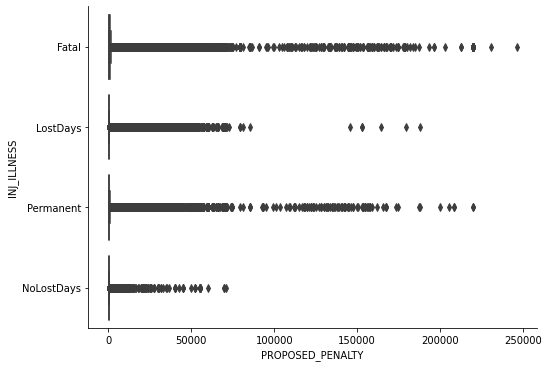

In [90]:
sns.catplot(x="PROPOSED_PENALTY", y="INJ_ILLNESS", data=violations, kind="box", aspect=1.5)
plt.show()

In [91]:
violations.groupby('INJ_ILLNESS').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                       
                         min         mean       max
INJ_ILLNESS                                        
Fatal                   50.0  1359.180262  246200.0
LostDays                50.0   392.324805  188000.0
NoLostDays              55.0   138.178369   70800.0
Permanent               50.0   765.378365  220000.0

INSIGHT: The worse the injury/impact, the higher the penalty.

#### Negligence: Number Affected

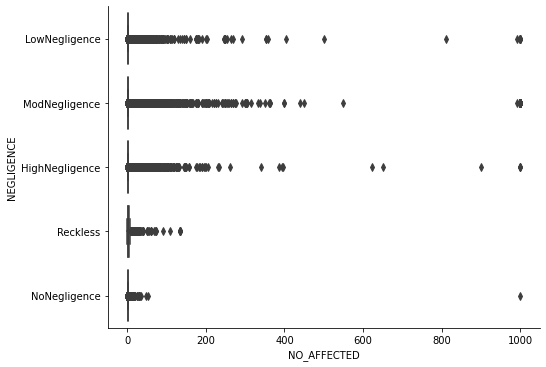

In [92]:
sns.catplot(x="NO_AFFECTED", y="NEGLIGENCE", data=violations, kind="box", aspect=1.5)
plt.show()

In [93]:
violations.groupby('NEGLIGENCE').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED               
                       min      mean  max
NEGLIGENCE                               
HighNegligence           0  1.878352  999
LowNegligence            0  1.370407  998
ModNegligence            0  1.499221  999
NoNegligence             0  1.807981  999
Reckless                 0  4.368368  134

INSIGHT: Reckless violations affect more people on average.

#### Negligence: Proposed Penalty

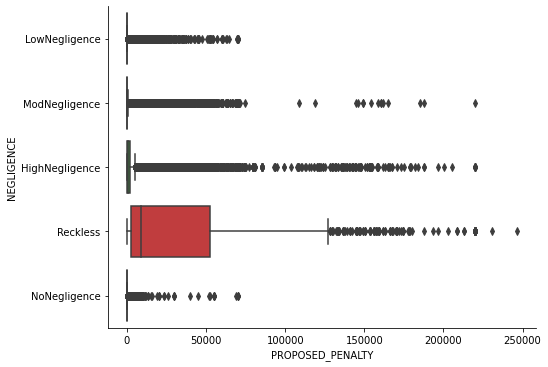

In [94]:
sns.catplot(x="PROPOSED_PENALTY", y="NEGLIGENCE", data=violations, kind="box", aspect=1.5)
plt.show()

In [95]:
violations.groupby('NEGLIGENCE').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                        
                            min          mean       max
NEGLIGENCE                                             
HighNegligence             55.0   2970.551688  220000.0
LowNegligence              55.0    289.351414   70000.0
ModNegligence              50.0    423.038766  220000.0
NoNegligence               55.0    682.605893   70000.0
Reckless                   55.0  32007.431113  246200.0

INSIGHT: Reckless and highly negligent actions carry higher penalties.

#### Enforcement Area: Number Affected

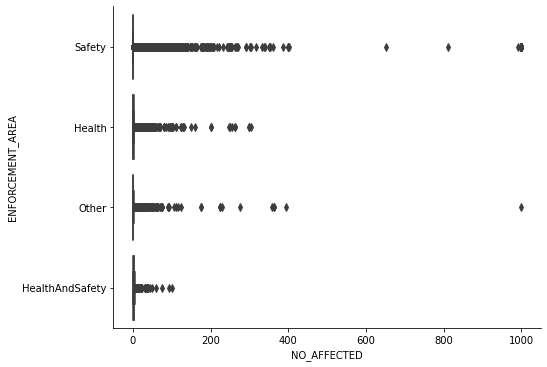

In [96]:
sns.catplot(x="NO_AFFECTED", y="ENFORCEMENT_AREA", data=violations, kind="box", aspect=1.5)
plt.show()

In [97]:
violations.groupby('ENFORCEMENT_AREA').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED               
                         min      mean  max
ENFORCEMENT_AREA                           
Health                     0  2.295928  304
HealthAndSafety            0  2.725637  100
Other                      0  1.425779  998
Safety                     0  1.904588  999

#### Enforcement Area: Proposed Penalty

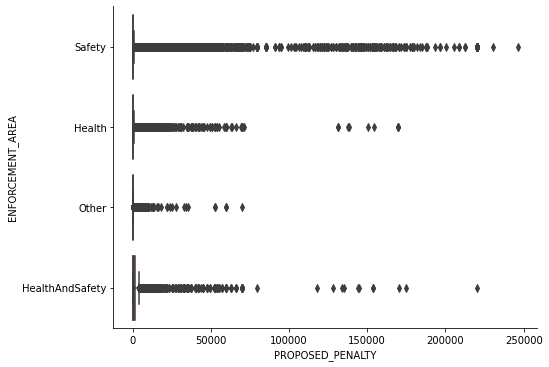

In [98]:
sns.catplot(x="PROPOSED_PENALTY", y="ENFORCEMENT_AREA", data=violations, kind="box", aspect=1.5)
plt.show()

In [99]:
violations.groupby('ENFORCEMENT_AREA').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                       
                              min         mean       max
ENFORCEMENT_AREA                                        
Health                       50.0   698.758709  169800.0
HealthAndSafety              55.0  2256.366657  220000.0
Other                        55.0   227.678915   70000.0
Safety                       55.0   738.672898  246200.0

INSIGHT: Health AND safety violations carry high penalties -- makes sense, they're double whammies!

#### Contested: Number Affected

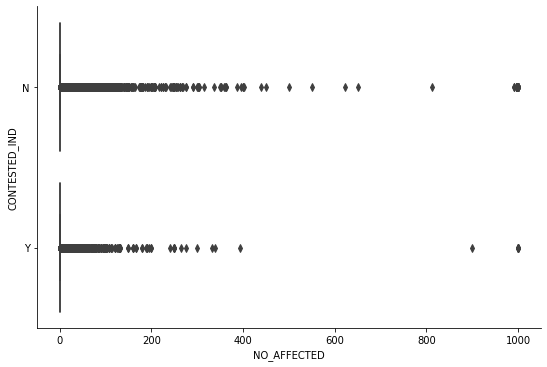

In [100]:
sns.catplot(x="NO_AFFECTED", y="CONTESTED_IND", data=violations, kind="box", aspect=1.5)
plt.show()

In [101]:
violations.groupby('CONTESTED_IND').agg({'NO_AFFECTED': ['min', 'mean', 'max']})

NO_AFFECTED               
                      min      mean  max
CONTESTED_IND                           
N                       0  1.426457  999
Y                       0  2.235907  999

INSIGHT: Interesting -- I wouldn't have that that contested violations would have affected more people on average!

#### Contested: Proposed Penalty

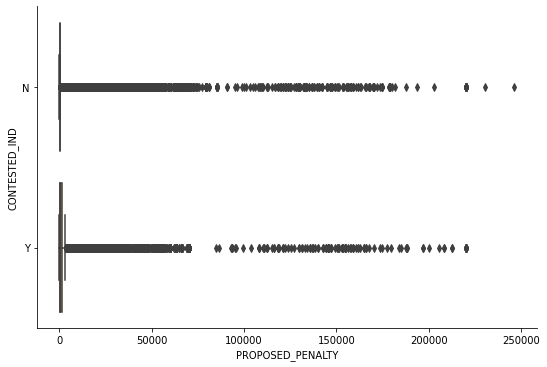

In [102]:
sns.catplot(x="PROPOSED_PENALTY", y="CONTESTED_IND", data=violations, kind="box", aspect=1.5)
plt.show()

In [103]:
violations.groupby('CONTESTED_IND').agg({'PROPOSED_PENALTY': ['min', 'mean', 'max']})

PROPOSED_PENALTY                       
                           min         mean       max
CONTESTED_IND                                        
N                         50.0   484.634852  246200.0
Y                          1.0  1973.085424  220000.0

INSIGHT: Interesting -- People contest higher proposed violations!

## Violations + Inspections Dataset

### Inspections Dataset Description:
1. EVENT_NO(VARCHAR2): A unique number used to identify each inspection, investigation, audit, survey, etc. (event).  Primary key to join to the Violations table. One event number can be associated with one or more violations.
2. MINE_ID(VARCHAR2): Identification number assigned to the operation inspected by MSHA. Use mine id to join to Mines table.
3. INSPECTION_BEGIN_DT (DATE): Start date of the inspection (mm/dd/yyyy).
4. INSPECTION_END_DT(DATE): Inspection close out date (mm/dd/yyyy).
5. CONTROLLER_ID (VARCHAR2): Identification number assigned by MSHA Assessments for a Legal Entity acting as a controller of an operator at the time of the inspection. May contain null values if this record pertains to a contractor working at the mine.
6. CONTROLLER_NAME (VARCHAR2): Name of the controller active at the time of the inspection. May contain null values if this record pertains to a contractor working at the mine.
7. OPERATOR_ID (VARCHAR2): Identification number assigned by MSHA for a Legal Entity acting as an operator at a mine at the time of the inspection. May not contain data (null values) if this record pertains to a contractor working at the mine.
8. OPERATOR_NAME (VARCHAR2): Name of the operator active at the time of the inspection. May contain null values if this record pertains to a contractor working at the mine.
9. CAL_YR (NUMBER) Calendar Year of the End Date of the inspection. May contain null values if the inspection remains open.
10. CAL_QTR (NUMBER): Calendar Quarter of the End Date of the inspection. May contain null values if the inspection remains open.
11. FISCAL_YR (NUMBER): Fiscal Year of the End Date of the inspection. MSHA's fiscal year begins October 1 and ends September 30. May not contain data (null value) if the inspection remains open.
12. FISCAL_QTR (NUMBER): Fiscal quarter of the End Date of the inspection. May contain null values if the inspection remains open.
13. INSPECT_OFFICE_CD (VARCHAR2): Office code of the inspector involved in the inspection.
14. ACTIVITY_CODE (VARCHAR2): Code used to identify the type of enforcement activity.  
15. ACTIVITY (VARCHAR2): Description of the inspection activity codes.
16. ACTIVE_SECTIONS (NUMBER): Number of active working sections inspected. Can contain zeroes.
17. IDLE_SECTIONS (NUMBER): Number of idle working sections inspected. Can contain zeroes.
18. SHAFT_SLOPE_SINK (NUMBER): Number of shaft/slope sinking construction areas inspected. Can contain zeroes.
19. IMPOUND_CONSTR (NUMBER): Number of impoundment construction operations inspected. Can contain zeroes.
20. BLDG_CONSTR_SITES (NUMBER): Number of building construction sites inspected. Can contain zeroes.
21. DRAGLINES (NUMBER): Number of draglines/shovel construction operations inspected. Can contain zeroes.
22. UNCLASSIFIED_CONSTR (NUMBER): Number of other unclassified construction areas inspected. Can contain zeroes.
23. CO_RECORDS (VARCHAR2): Company records inspected indicator (Y or N).
24. SURF_UG_MINE (VARCHAR2): Surface area/underground mine inspected indicator (Y or N).
25. SURF_FACILITY_MINE (VARCHAR2): Surface mine/facililty inspected indicator (Y or N).
26. REFUSE_PILES (VARCHAR2): Identified refuse piles inspected indicator (Y or N).
27. EXPLOSIVE_STORAGE (VARCHAR2): Explosives storage inspected indicator (Y or N).
28. OUTBY_AREAS (VARCHAR2): Outby areas inspected indicator(Y or N).
29. MAJOR_CONSTR (VARCHAR2): Major construction operation inspected indicator (Y or N).
30. SHAFTS_SLOPES (VARCHAR2): Shafts/slopes inspected indicator (Y or N).
31. IMPOUNDMENTS (VARCHAR2): Identified impoundments inspected indicator (Y or N).
32. MISC_AREA (VARCHAR2): Coal areas of inspection Not Elsewhere Classified (NEC) indicator (Y or N).
33. PROGRAM_AREA (VARCHAR2): Program area (Coal or Metal/Non-Metal) associated with the inspection.
34. SAMPLE_CNT_AIR (NUMBER): Number of air samples collected. May contain null values if sample not taken.
35. SAMPLE_CNT_DUSTSPOT (NUMBER): Number of spot dust samples collected. May contain null values if sample not taken.
36. SAMPLE_CNT_DUSTSURVEY (NUMBER): Number of survey samples collected. May contain null values if sample not taken.
37. SAMPLE_CNT_RESPDUST (NUMBER): Number of respiratory dust samples collected. May contain null values if sample not taken.
38. SAMPLE_CNT_NOISE (NUMBER): Number of noise samples collected. May contain null values if sample not taken.
39. SAMPLE_CNT_OTHER (NUMBER): Number of other samples collected. May contain null values if sample not taken.
40. NBR_INSPECTORS (NUMBER): Total number of inspectors working on this inspection.
41. TOTAL_ON_SITE_HOURS (NUMBER): Total hours recorded on the Weekly Time and Activity Data form: On-Site Inspection Time (MNM), MMU Pit Time (C), Outby (Coal UG Mines), Surface Area Time (C) and C/O Writing On Site (MNM, C). Task code S,T,O hours included. 
42. TOTAL_INSP_HOURS (NUMBER): Total hours recorded on the Weekly Time and Activity Data form: On-Site Inspection Time (MNM), MMU Pit Time (C), Outby (Coal UG mines), Surface Area Time (C), C/O Writing On Site (MNM,C), C/O Writing Off Site, Travel, Other. Task code S,T.O hours included. 
43. COAL_METAL_IND (VARCHAR2): Identifies if the inspection was at a Coal or Metal/Non-Metal mine.
44. TOTAL_ON_SITE_HRS_SPVR_TRAINEE (NUMBER): Total supervisory/trainee task code hours to be subtracted from TOTAL_ON_SITE_HOURS for total on-site inspection time only.
45. TOTAL_INSP_HRS_SPVR_TRAINEE (NUMBER): Total supervisory/trainee task code hours to be subtracted from TOTAL_INSP_HOURS for total on-site inspection time only.

## Inspections + Mines Dataset

In [127]:
inspections_mines = pd.merge(inspections, mines ,on='MINE_ID')
inspections_mines

,EVENT_NO,MINE_ID,INSPECTION_BEGIN_DT,INSPECTION_END_DT,CONTROLLER_ID,CONTROLLER_NAME,OPERATOR_ID,OPERATOR_NAME,CAL_YR,CAL_QTR,...,NO_NONPRODUCING_PITS,NO_TAILING_PONDS,PILLAR_RECOVERY_USED,HIGHWALL_MINER_USED,MULTIPLE_PITS,MINERS_REP_IND,SAFETY_COMMITTEE_IND,MILES_FROM_OFFICE,DIRECTIONS_TO_MINE,NEAREST_TOWN
0,4157655,4405815,03/06/2008,03/10/2008,C07082,Cumberland Resources Corporation,P22270,Guest Mountain Mining Corporation,2008.0,1,...,0.0,NaN,N,N,N,N,N,38,"Go 12.3 miles on US23 South. Take Exit 1, tur...",Roda
1,4131899,4405815,12/11/2002,12/16/2002,C15904,Harold Sturgill,P24350,Appalachia Coal Company Inc,2002.0,4,...,0.0,NaN,N,N,N,N,N,38,"Go 12.3 miles on US23 South. Take Exit 1, tur...",Roda
2,4157530,4405815,01/08/2008,01/09/2008,C07082,Cumberland Resources Corporation,P22270,Guest Mountain Mining Corporation,2008.0,1,...,0.0,NaN,N,N,N,N,N,38,"Go 12.3 miles on US23 South. Take Exit 1, tur...",Roda
3,4137694,4405815,07/09/2002,08/19/2002,C15904,Harold Sturgill,P24350,Appalachia Coal Company Inc,2002.0,3,...,0.0,NaN,N,N,N,N,N,38,"Go 12.3 miles on US23 South. Take Exit 1, tur...",Roda
4,4127035,4405815,10/29/2003,10/29/2003,C15904,Harold Sturgill,P24350,Appalachia Coal Company Inc,2003.0,4,...,0.0,NaN,N,N,N,N,N,38,"Go 12.3 miles on US23 South. Take Exit 1, tur...",Roda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038242,899876,4300691,07/02/2008,07/02/2008,M06183,CRH PLC,L10129,"Pike Industries, Inc",2008.0,3,...,NaN,0.0,N,N,N,N,N,150,Portable Operation. Location notification by 5...,Barre
1038243,6692819,3901603,08/26/2014,08/26/2014,0117825,Robert D Miller; Cody J Miller,0138415,Miller Mining,2014.0,3,...,NaN,0.0,N,N,N,N,N,50,8 miles South of Custer on Highway 385,Custer
1038244,4420232,4406958,09/21/2017,09/21/2017,C02508,Massey Energy Company,P24398,Roda Resources Llc,2017.0,3,...,0.0,NaN,N,N,N,N,N,0,"Take Business 23 to Appalachia, from Appalachi...",Appalachia
1038245,360464,202158,08/17/2000,08/17/2000,M37563,Lorimor Walter,L37563,Rainbow Enterprises,2000.0,3,...,NaN,NaN,N,N,N,N,N,60,NaN,NaN


## Violations + Inspections + Mines Dataset

In [129]:
violations_inspections_mines = pd.merge(violations, inspections_mines ,on= 'EVENT_NO')
violations_inspections_mines

,EVENT_NO,INSPECTION_BEGIN_DT_x,INSPECTION_END_DT_x,VIOLATION_NO,CONTROLLER_ID_x,CONTROLLER_NAME_x,VIOLATOR_ID,VIOLATOR_NAME,VIOLATOR_TYPE_CD,MINE_ID_x,...,NO_NONPRODUCING_PITS,NO_TAILING_PONDS,PILLAR_RECOVERY_USED,HIGHWALL_MINER_USED,MULTIPLE_PITS,MINERS_REP_IND,SAFETY_COMMITTEE_IND,MILES_FROM_OFFICE,DIRECTIONS_TO_MINE,NEAREST_TOWN
0,711256,01/04/2000,2000-01-07,6089192,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,NaN,0.0,N,N,N,N,N,100,Approx 7 miles south of the city of Alabaster ...,Calera
1,711256,01/04/2000,2000-01-07,6089193,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,NaN,0.0,N,N,N,N,N,100,Approx 7 miles south of the city of Alabaster ...,Calera
2,711256,01/04/2000,2000-01-07,6089194,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,NaN,0.0,N,N,N,N,N,100,Approx 7 miles south of the city of Alabaster ...,Calera
3,711256,01/04/2000,2000-01-07,6089195,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,NaN,0.0,N,N,N,N,N,100,Approx 7 miles south of the city of Alabaster ...,Calera
4,711256,01/04/2000,2000-01-07,6089196,0041044,Lhoist Group,L13586,"Lhoist North America of Alabama, LLC",Operator,100003,...,NaN,0.0,N,N,N,N,N,100,Approx 7 miles south of the city of Alabaster ...,Calera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2812758,6644004,12/10/2012,2012-12-13,8727304,0042611,Ann E Abramson,0051892,Aggregate Inc,Operator,5500013,...,NaN,0.0,N,N,N,N,N,0,North of F'Sted Entrance to West Scenic Road.,St. Crox
2812759,6644004,12/10/2012,2012-12-13,8727305,0042611,Ann E Abramson,0051892,Aggregate Inc,Operator,5500013,...,NaN,0.0,N,N,N,N,N,0,North of F'Sted Entrance to West Scenic Road.,St. Crox
2812760,6644004,12/10/2012,2012-12-13,8727306,0042611,Ann E Abramson,0051892,Aggregate Inc,Operator,5500013,...,NaN,0.0,N,N,N,N,N,0,North of F'Sted Entrance to West Scenic Road.,St. Crox
2812761,6644004,12/10/2012,2012-12-13,8727307,0042611,Ann E Abramson,0051892,Aggregate Inc,Operator,5500013,...,NaN,0.0,N,N,N,N,N,0,North of F'Sted Entrance to West Scenic Road.,St. Crox


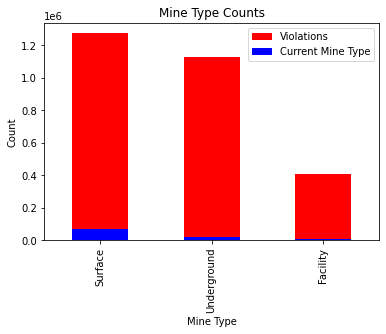

In [136]:
# MINE_TYPE stacked bar plot with CURRENT_MINE_TYPE from Mines data
 
fig, ax = plt.subplots()

violations['MINE_TYPE'].value_counts().plot(kind='bar', color='r', ax=ax, label='Violations', stacked=True)
mines['CURRENT_MINE_TYPE'].value_counts().plot(kind='bar', color='b', ax=ax, label='Current Mine Type', stacked=True)

ax.set_xlabel('Mine Type')
ax.set_ylabel('Count')
ax.set_title('Mine Type Counts')
ax.legend()

plt.show()



INSIGHT:
From the stacked bar plot above, we can see that there are clearly more violations occuring per mine type than there are actual mines, indicating that mines, of all types, often have more than one violation per mine. But, the mine types still appear to be relatively proportional number of violations per mine type. For example, surface mines have the most mines, and appear to also have the most violations, which makes sense. On the otherhand, facility mines, which have the least number of mines, also appear to have the least number of violations. 

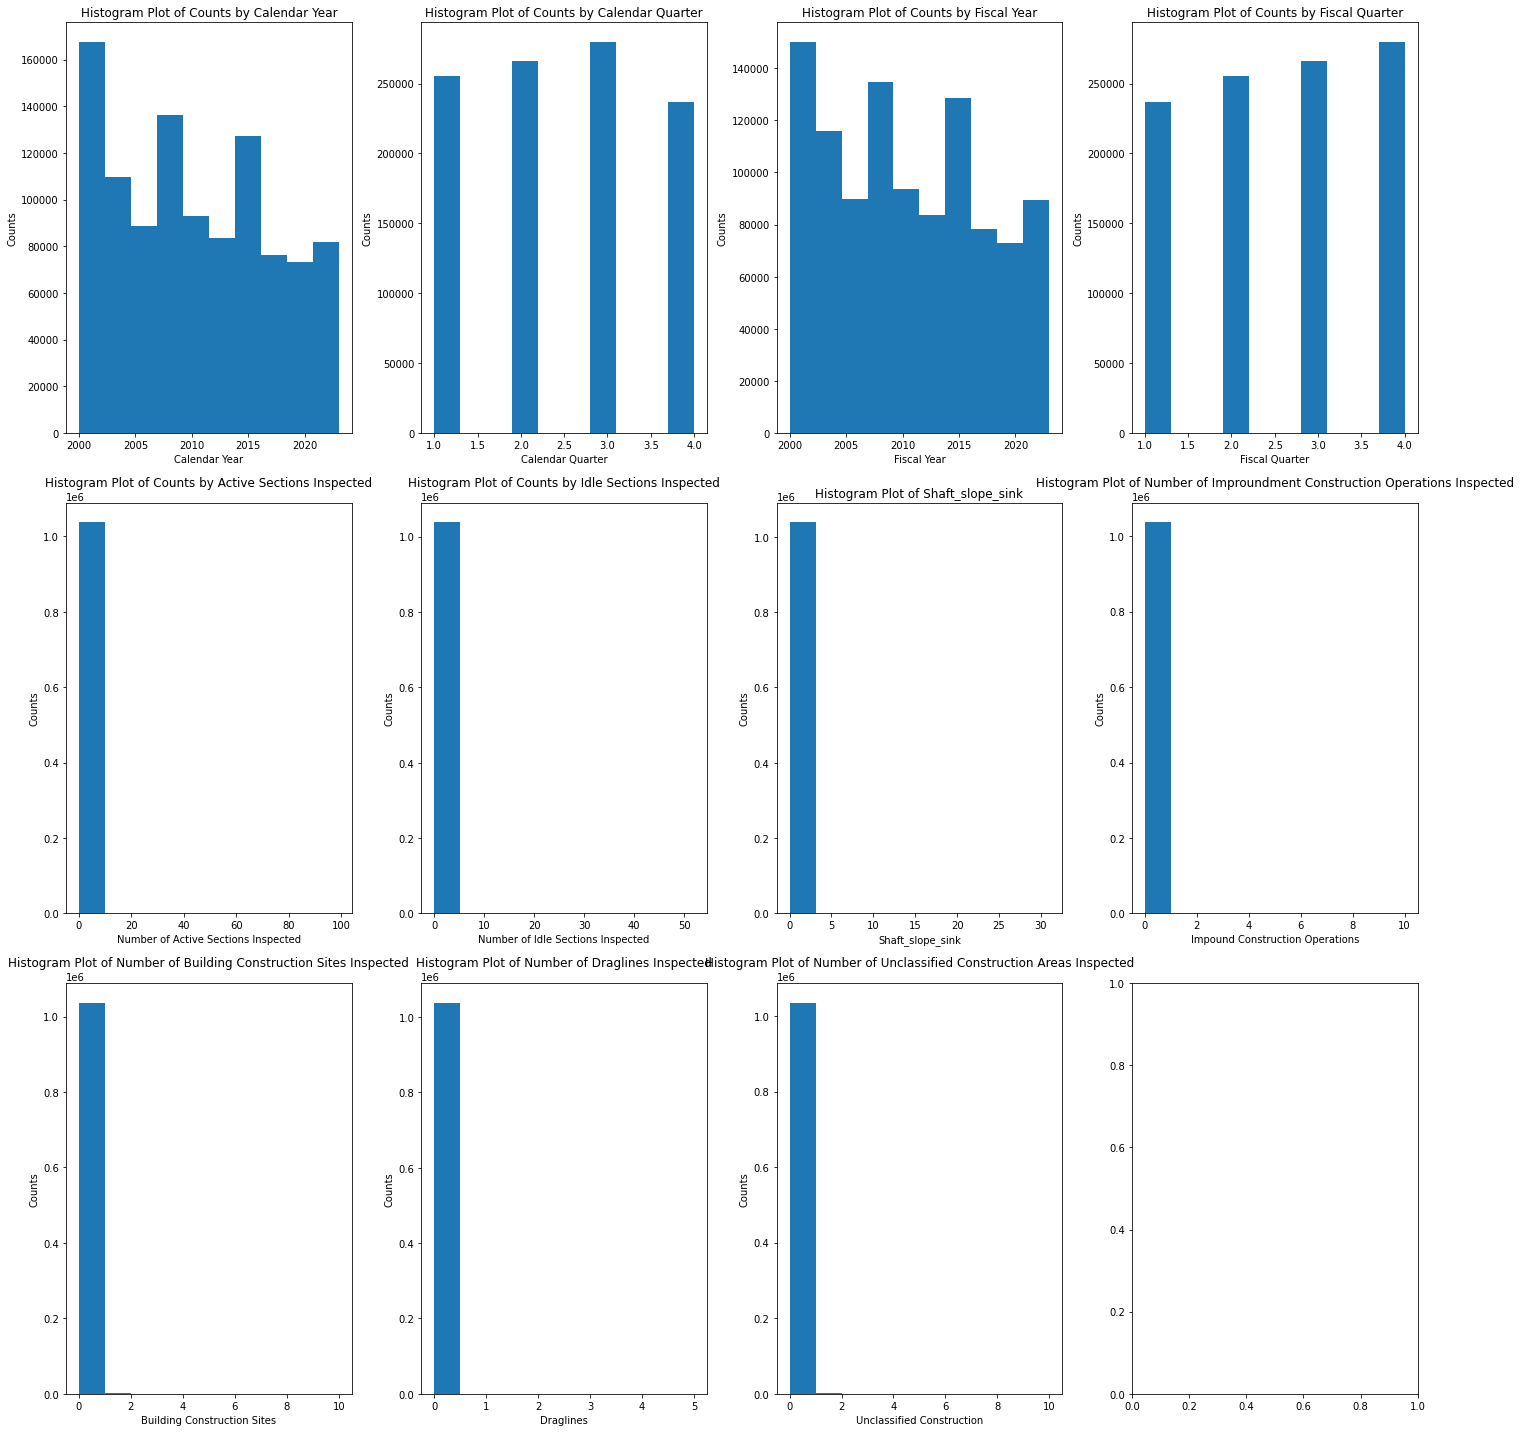

In [140]:
# histograms of numberical variables in inspections df

fig, axs = plt.subplots(3, 4, figsize = (20, 20))

# cal_yr histogram
axs[0,0].hist(inspections['CAL_YR'])
axs[0,0].set_xlabel('Calendar Year')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_title('Histogram Plot of Counts by Calendar Year')

# cal_qtr histogram
axs[0,1].hist(inspections['CAL_QTR'])
axs[0,1].set_xlabel('Calendar Quarter')
axs[0,1].set_ylabel('Counts')
axs[0,1].set_title('Histogram Plot of Counts by Calendar Quarter')

# fiscal_yr histogram
axs[0,2].hist(inspections['FISCAL_YR'])
axs[0,2].set_xlabel('Fiscal Year')
axs[0,2].set_ylabel('Counts')
axs[0,2].set_title('Histogram Plot of Counts by Fiscal Year')

# fiscal_qtr histogram
axs[0,3].hist(inspections['FISCAL_QTR'])
axs[0,3].set_xlabel('Fiscal Quarter')
axs[0,3].set_ylabel('Counts')
axs[0,3].set_title('Histogram Plot of Counts by Fiscal Quarter')

# active_sections histogram
axs[1,0].hist(inspections['ACTIVE_SECTIONS'])
axs[1,0].set_xlabel('Number of Active Sections Inspected')
axs[1,0].set_ylabel('Counts')
axs[1,0].set_title('Histogram Plot of Counts by Active Sections Inspected')

# idle_sections histogram
axs[1,1].hist(inspections['IDLE_SECTIONS'])
axs[1,1].set_xlabel('Number of Idle Sections Inspected')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_title('Histogram Plot of Counts by Idle Sections Inspected')

# shaft_slope_sink histogram
axs[1,2].hist(inspections['SHAFT_SLOPE_SINK'])
axs[1,2].set_xlabel('Shaft_slope_sink')
axs[1,2].set_ylabel('Counts')
axs[1,2].set_title('Histogram Plot of Shaft_slope_sink')

# impound_constr histogram
axs[1,3].hist(inspections['IMPOUND_CONSTR'])
axs[1,3].set_xlabel('Impound Construction Operations')
axs[1,3].set_ylabel('Counts')
axs[1,3].set_title('Histogram Plot of Number of Improundment Construction Operations Inspected')

# building_construction_sites histogram
axs[2,0].hist(inspections['BLDG_CONSTR_SITES'])
axs[2,0].set_xlabel('Building Construction Sites')
axs[2,0].set_ylabel('Counts')
axs[2,0].set_title('Histogram Plot of Number of Building Construction Sites Inspected')

# DRAGLINES histogram
axs[2,1].hist(inspections['DRAGLINES'])
axs[2,1].set_xlabel('Draglines')
axs[2,1].set_ylabel('Counts')
axs[2,1].set_title('Histogram Plot of Number of Draglines Inspected')

# unclassified_constr histogram
axs[2,2].hist(inspections['UNCLASSIFIED_CONSTR'])
axs[2,2].set_xlabel('Unclassified Construction')
axs[2,2].set_ylabel('Counts')
axs[2,2].set_title('Histogram Plot of Number of Unclassified Construction Areas Inspected')

plt.tight_layout()
plt.show()

# Pre-Processing & Cleaning

### Nulls

In [105]:
# assessing null values in the df
pd.set_option('display.max_rows', None)

missing_sum = violations.isna().sum()
print(missing_sum[missing_sum > 0])

pd.reset_option('display.max_rows')


INSPECTION_END_DT                 7665
CONTROLLER_ID                   192131
CONTROLLER_NAME                 192131
VIOLATOR_ID                        120
VIOLATOR_NAME                      135
MINE_TYPE                           21
CONTRACTOR_ID                  2622477
SIG_SUB                          45093
SECTION_OF_ACT                 2796797
PART_SECTION                     30731
SECTION_OF_ACT_2               2811540
ORIG_TERM_DUE_DT                677782
ORIG_TERM_DUE_TIME              677782
LATEST_TERM_DUE_DT               94312
LATEST_TERM_DUE_TIME             94312
TERMINATION_DT                   18626
TERMINATION_TIME                 18626
VACATE_DT                      2812687
VACATE_TIME                    2812687
INITIAL_VIOL_NO                2737136
REPLACED_BY_ORDER_NO           2795513
LIKELIHOOD                       46331
INJ_ILLNESS                      46314
NEGLIGENCE                       46297
WRITTEN_NOTICE                 1440981
ENFORCEMENT_AREA         

### Duplicates

In [106]:
violations.duplicated().sum()

0

In [142]:
# creating new column INSPECTION_LENGTH_DAYS from INSPECTION_BEGIN_DT and INSPECTION_END_DT
violations['INSPECTION_LENGTH_DAYS'] = pd.to_datetime(violations['INSPECTION_END_DT']) - pd.to_datetime(violations['INSPECTION_BEGIN_DT'])

# subset of rows with missing INSPECTION_END_DT
missing_end_dt = violations[violations['INSPECTION_END_DT'].isnull()]
missing_end_dt

,EVENT_NO,INSPECTION_BEGIN_DT,INSPECTION_END_DT,VIOLATION_NO,CONTROLLER_ID,CONTROLLER_NAME,VIOLATOR_ID,VIOLATOR_NAME,VIOLATOR_TYPE_CD,MINE_ID,...,LAST_ACTION_CD,LAST_ACTION_DT,DOCKET_NO,DOCKET_STATUS_CD,CONTESTED_IND,CONTESTED_DT,VIOLATOR_VIOLATION_CNT,VIOLATOR_INSPECTION_DAY_CNT,INSPECTION_LENGTH_DAYS,Year
1606,6915855,05/24/2023,NaT,9637818,0071891,Vulcan Materials Company,L16168,"Vulcan Construction Materials, LLC",Operator,100009,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN
1607,6915855,05/24/2023,NaT,9637819,0071891,Vulcan Materials Company,L16168,"Vulcan Construction Materials, LLC",Operator,100009,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN
1608,6915855,05/24/2023,NaT,9637820,0071891,Vulcan Materials Company,L16168,"Vulcan Construction Materials, LLC",Operator,100009,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN
1609,6915855,05/24/2023,NaT,9637821,0071891,Vulcan Materials Company,L16168,"Vulcan Construction Materials, LLC",Operator,100009,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN
1610,6915855,05/24/2023,NaT,9637822,0071891,Vulcan Materials Company,L16168,"Vulcan Construction Materials, LLC",Operator,100009,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784173,6469123,05/31/2023,NaT,9158352,0148941,Chris M Kusilek; Dianna J Kusilek,0138075,Ramsey Hill Exploration LLC,Operator,4801853,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN
2784174,6469123,05/31/2023,NaT,9158353,0148941,Chris M Kusilek; Dianna J Kusilek,0138075,Ramsey Hill Exploration LLC,Operator,4801853,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN
2784175,6469123,05/31/2023,NaT,9158354,0148941,Chris M Kusilek; Dianna J Kusilek,0138075,Ramsey Hill Exploration LLC,Operator,4801853,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN
2784176,6469123,05/31/2023,NaT,9158355,0148941,Chris M Kusilek; Dianna J Kusilek,0138075,Ramsey Hill Exploration LLC,Operator,4801853,...,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaT,NaN


<ipython-input-122-d288e03bfa21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_end_dt['INSPECTION_BEGIN_DT'] = pd.to_datetime(missing_end_dt['INSPECTION_BEGIN_DT'])
<ipython-input-122-d288e03bfa21>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_end_dt['Year'] = missing_end_dt['INSPECTION_BEGIN_DT'].dt.year


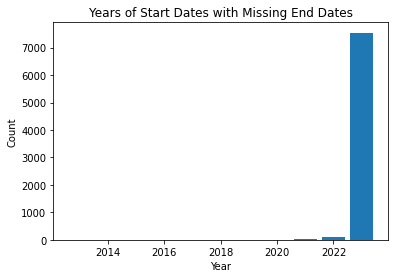

In [122]:
# visualizing the missing INSPECTION_END_DT's by year to test theory that majority of missings
# are coming from 2023 because inspection is still ongoing
missing_end_dt['INSPECTION_BEGIN_DT'] = pd.to_datetime(missing_end_dt['INSPECTION_BEGIN_DT'])
missing_end_dt['Year'] = missing_end_dt['INSPECTION_BEGIN_DT'].dt.year
counts_by_year = missing_end_dt['Year'].value_counts().sort_index()

plt.bar(counts_by_year.index, counts_by_year.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Years of Start Dates with Missing End Dates')
plt.show()

Insight: We can see that majority of the inspections with missing end dates are inspections that started in 2023, which makes sense, given that those inspections are likely still ongoing. Would make sense to remove year 2023 of INSPECTION_BEGIN_DT from dataframe. We can also see in counts_by_year that there are some missing end dates for some pretty early years (i.e., 2013, 2014, 2015). Inspection may have been terminated or for some other reason the inspection was never completed, so would make sense to remove these as well. 

In [141]:
counts_by_year

Year
2013       2
2014       1
2015       1
2018       2
2019       9
2020       3
2021      19
2022      86
2023    7542
Name: count, dtype: int64

In [146]:
# creating new column 'VIOLATION_FREQUENCY' from count of occurrences of 'VIOLATION_NO'
violations['VIOLATION_FREQ'] = violations['VIOLATION_NO'].map(violations['VIOLATION_NO'].value_counts())


In [152]:
violations[violations['VIOLATION_FREQ'] == 2]

,EVENT_NO,INSPECTION_BEGIN_DT,INSPECTION_END_DT,VIOLATION_NO,CONTROLLER_ID,CONTROLLER_NAME,VIOLATOR_ID,VIOLATOR_NAME,VIOLATOR_TYPE_CD,MINE_ID,...,LAST_ACTION_DT,DOCKET_NO,DOCKET_STATUS_CD,CONTESTED_IND,CONTESTED_DT,VIOLATOR_VIOLATION_CNT,VIOLATOR_INSPECTION_DAY_CNT,INSPECTION_LENGTH_DAYS,Year,VIOLATION_FREQ
465422,6156330,01/30/2008,2008-02-01,6673447,C15833,Peabody Energy,P24038,Big Ridge Inc,Operator,1103054,...,11/01/2010,LAKE 2008-560,Accepted,Y,07/23/2008,443.0,516.0,2 days,2008.0,2
465423,6156330,01/30/2008,2008-02-01,6673447,C15833,Peabody Energy,P24038,Big Ridge Inc,Operator,1103054,...,11/01/2010,NaN,NaN,N,NaN,443.0,516.0,2 days,2008.0,2
565247,982159,09/12/2005,2005-09-13,6172473,NaN,NaN,E24,Austin Powder Company,Contractor,1202322,...,03/02/2007,LAKE 2006-117M,Accepted,Y,05/23/2006,39.0,0.0,1 days,2005.0,2
565248,982159,09/12/2005,2005-09-13,6172473,NaN,NaN,E24,Austin Powder Company,Contractor,1202322,...,03/02/2007,LAKE 2006-117M,Accepted,Y,08/09/2006,39.0,0.0,1 days,2005.0,2
754539,4206742,01/03/2002,2002-01-28,7531415,C15970,Charles Stump,P24481,Highlands Mining & Processing Company Inc,Operator,1516011,...,11/28/2012,KENT 2002-242,Accepted,Y,02/09/2005,0.0,0.0,25 days,2002.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350192,4052852,08/16/2000,2000-11-09,7088629,C00692,CONSOL Energy Inc,P00812,Consolidation Coal Company,Operator,4601968,...,08/01/2005,WEVA20020093,Accepted,Y,04/10/2002,0.0,0.0,85 days,2000.0,2
2350193,4052852,08/16/2000,2000-11-09,7088630,C00692,CONSOL Energy Inc,P00812,Consolidation Coal Company,Operator,4601968,...,08/01/2005,WEVA 2002-83,Accepted,Y,01/06/2005,753.0,49.0,85 days,2000.0,2
2350194,4052852,08/16/2000,2000-11-09,7088630,C00692,CONSOL Energy Inc,P00812,Consolidation Coal Company,Operator,4601968,...,08/01/2005,WEVA20020093,Accepted,Y,04/10/2002,753.0,49.0,85 days,2000.0,2
2734897,966859,07/10/2003,2003-07-15,6138868,NaN,NaN,G492,"RBX, INC.",Contractor,4703037,...,11/16/2004,LAKE 2003-164-M,Accepted,Y,09/17/2003,0.0,0.0,5 days,2003.0,2
